### Case Study 4 :  Data Science Shark Tank

***Due Date: December 4, 2024 before 11:59pm***

Note: 
    
***part_1 and part_3 of Problem_1, and links to datasets (or API you are planning to use) should be sent to me by email (tghoshal@wpi.edu) before 11:59pm on November 14. You must CC all your group members in that email. Without this step, your project may not be approved for presentation on December 05.***

also NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!

### Introduction

After the previous 3 case studies,  your are now equipped with three powerful skills of an effective data scientist: ***data gathering, model development, exploratory data analysis***. In this case study, your team is going to act like a data science team in a mid-size company. Your team will make use of these skills to come up with an idea for a new data science project, covince senior executives of the idea to get funding/ financial resources using data driven presentations, and finally build a prototype model for use by another team within the company. 

Your team needs to decide which business problem is important for the market your company is in (for example, social media market, housing market, search market, etc.). Then use data science approaches to gather data, explore the data, tie with business needs, make conjectures, develop models etc.

The solution should include some key components of data science: 

    1) the business part to analyze the potential impact of your new/improved service, why the idea can make money, how are you planning to persuade senior executives (e.g. seniors VPS/ CEO/ COO) to allocate money for your project
    
    2) collect data, perform exploratory data analysis, make conjectures in support of the business plan made in the previous step.
    
    3) Use one of your conjectures from step 2 as the motivation for developing a model. Use appropriate features from your data and build the model.

NOTE, as opposed to the first three case studies, case study 4 is much much more open ended. A more complex model does not mean a better project. Also, strong exploratory data analysis loosely tied with the business question also does not mean a better project. Try to make all parts coherent so that they collectively tell one story.

# Background (Elevator Pitch)

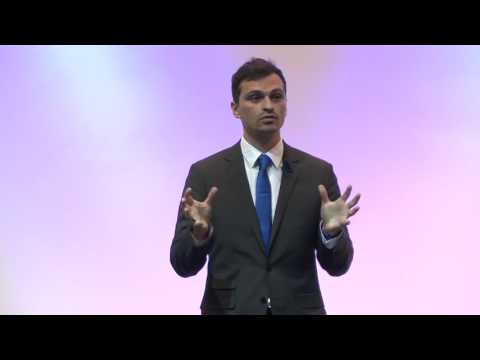

In [1]:
# Should your project presentation be like this?

from IPython.display import YouTubeVideo
YouTubeVideo("7a_lu7ilpnI") 

## Some Resources

### Two videos on storytelling

https://video.wpi.edu/Watch/g2T4NjBn

https://video.wpi.edu/Watch/q2A6Dbg3


**Optional Readings:** 


**APIs**
* Zillow API: https://pypi.python.org/pypi/pyzillow
* Google Map API: https://developers.google.com/api-client-library/python/apis/mapsengine/v1?hl=en
* More APIs: https://github.com/ptwobrussell/Mining-the-Social-Web-2nd-Edition

**Python libraries you may want to use:**
* Scikit-learn (http://scikit-learn.org): machine learning tools in Python.

**Data sources:**
* UCI Machine Learning Repository: http://archive.ics.uci.edu/ml/ 
* Statlib datasets: http://lib.stat.cmu.edu/datasets/
* Kaggel: www.kaggle.com 
* Open Gov. Data: www.data.gov, www.data.gov.uk, https://www.data.gouv.fr/fr/, https://www.oecd.org/gov/digital-government/open-government-data.htm




### Problem 1: the Business Part (20 points)
 As a group, learn about the data science related business and research about the current markets: such as search, social media, advertisement, recommendation and so on. Pick one of the markets for further consideration, and propose a new data science project which you believe will be important for your company to do well in the market. Define precisely in the report and briefly in the cells below, what is the business problem that your team wants to solve.
Why the problem is important to solve? 
Why you believe your team can make use of data science methodologies to solve the problem?
How are you planing to persuade the senior executives to buy in your idea.

**Please describe here *briefly*  (please edit this cell)**

1) **Your business problem to solve:** We want to develop a loan approval prediction model that can correctly predict the likelihood of approval of loans to potential borrowers. This model will help the banks make more informed decisions regarding loan applications, thereby reducing the risk of defaults and enhancing their lending efficiency. 


2) **Why the problem is important to solve?** Accurate prediction of loan approval can have a wide impact on the lending operations of any bank by: Reducing loan defaults by identifying high-risk borrowers, Smoothing the process of loan approval, Increasing customer satisfaction with quicker and more accurate decisions, Targeted marketing and customer segmentation.



3) **What is your idea to solve the problem?** We will develop a machine learning model that uses demographic, credit, and loan-related information to predict loan outcomes. In our model, we will incorporate all the various factors for comprehensive and accurate prediction.


4) **What differences you could make with your data science approach?** Our data science approach involves: Thorough EDA to understand the relationships between various factors and loan approval outcomes, Feature engineering to create meaningful and predictive variables, Model selection and evaluation to identify the best performing model, Continuous improvement through model updates and fine-tuning.



5) **Why do you believe the idea deserves the financial resources of your company?** It will reduce the risks related to loan defaults and can save enormous amounts of money. Our idea will improve the efficiency of the loan approval process and thereby make the bank capable of serving a large number of customers and increasing revenue. It will increase customer satisfaction and trust through faster and more accurate decisions. Finally, it will drive competitiveness in the market by proposing innovative and data-driven solutions.






### Problem 2: Data Gathering, Exploratory Data Analysis, Make Conjectures (20 points)

Gather data in support of your responses for Problem 1. Use appropriate data analysis techniques to explore the data. Make conejectures in relation to problem 1. Find support for your conjectures using the data.

https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data

# Imports and Inputs

In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
df = pd.read_csv('loan_data.csv')

In [4]:
df.head()

person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561   
1                 0.08                         2.0           504   
2                 0.44                         3.0           635   
3                 0.44                         2.0           675   
4                 0.53                         4.0           586   

  previous_loan_defaults_on_file  loan_status  
0                             No            1  
1                            Yes            0  
2                             No            1  
3                             No            1  
4                             No            1

In [5]:
df.columns = ['Age', 'Sex', 'Education Level', 'Income', 'Employment Years', 'Home Ownership', 'Loan Amount', 'Loan Intent',
              'Interest Rate', 'Percentage of Income', 'Years of Credit History', 'Credit Score', 'Defaults', 'Status']

# Data Exploration

In [6]:
df.shape

(45000, 14)

<Axes: >

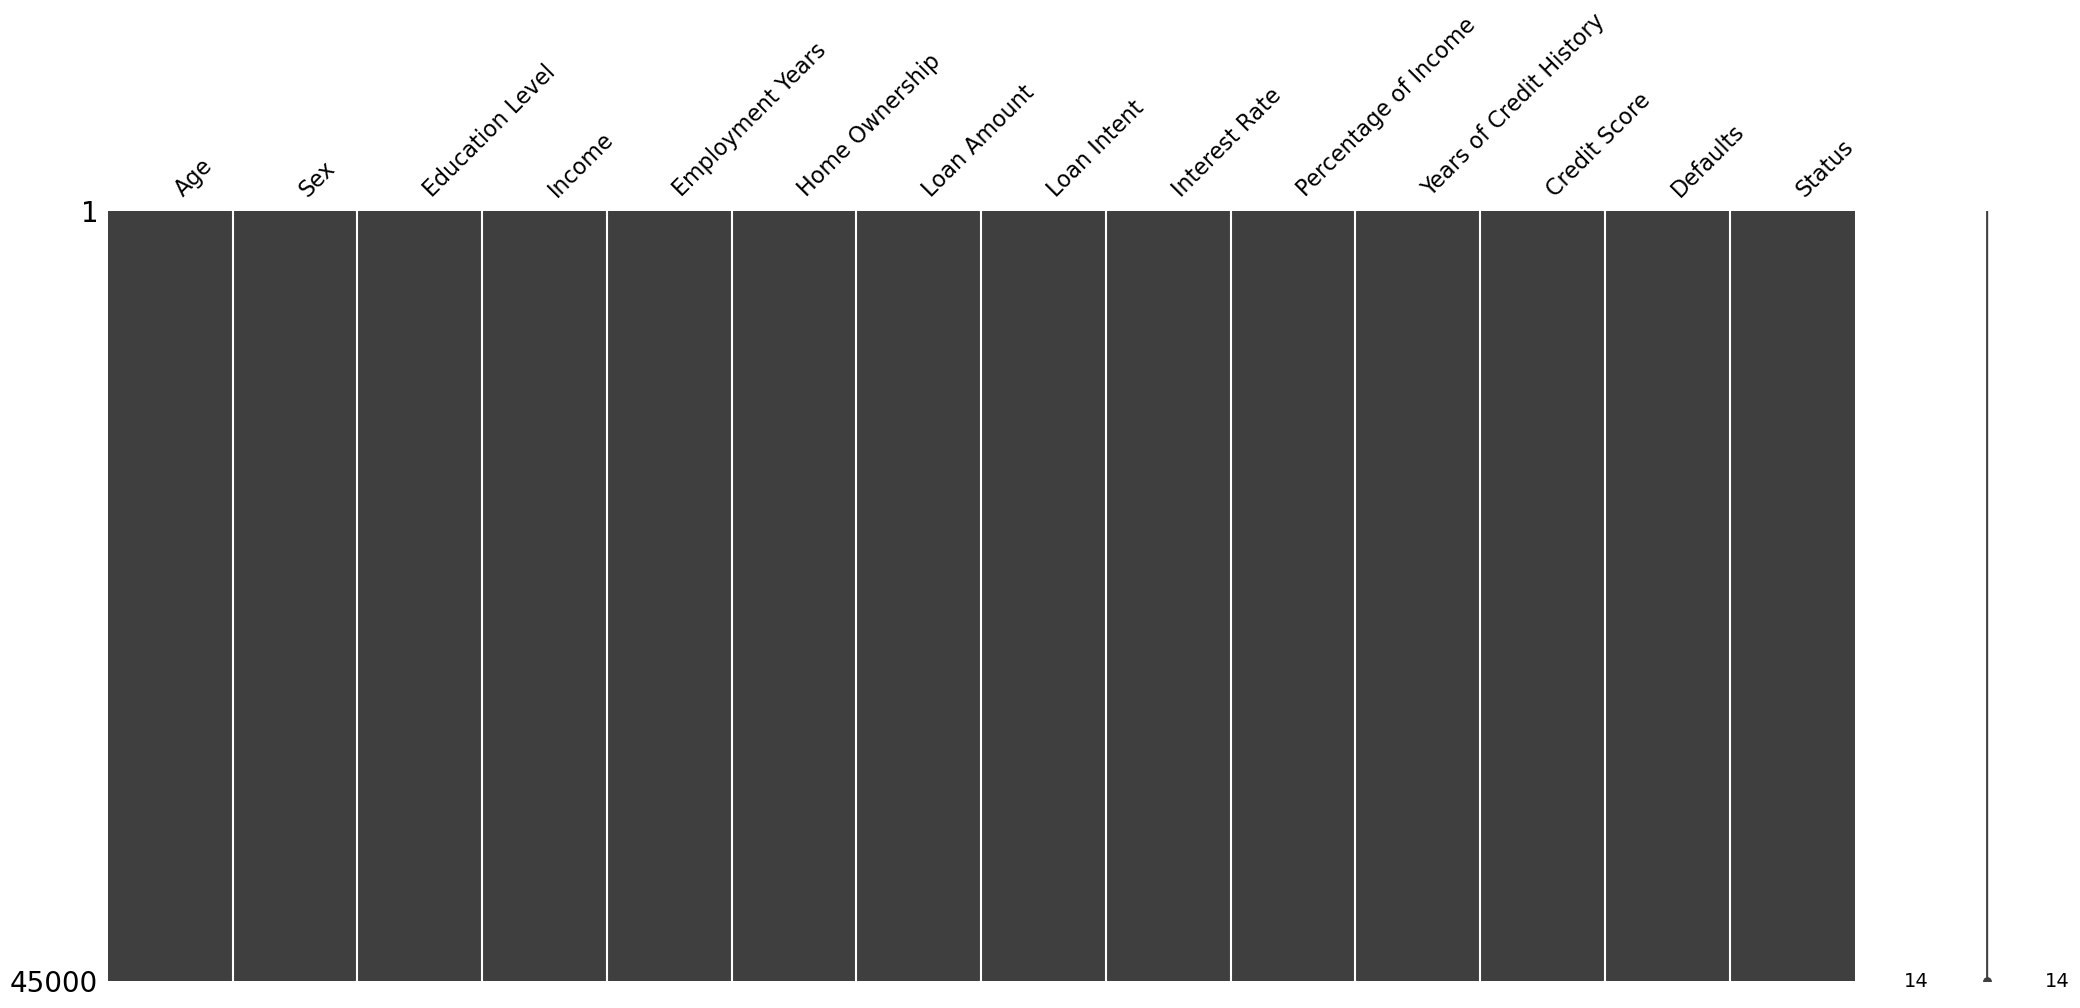

In [7]:
msno.matrix(df)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      45000 non-null  float64
 1   Sex                      45000 non-null  object 
 2   Education Level          45000 non-null  object 
 3   Income                   45000 non-null  float64
 4   Employment Years         45000 non-null  int64  
 5   Home Ownership           45000 non-null  object 
 6   Loan Amount              45000 non-null  float64
 7   Loan Intent              45000 non-null  object 
 8   Interest Rate            45000 non-null  float64
 9   Percentage of Income     45000 non-null  float64
 10  Years of Credit History  45000 non-null  float64
 11  Credit Score             45000 non-null  int64  
 12  Defaults                 45000 non-null  object 
 13  Status                   45000 non-null  int64  
dtypes: float64(6), int64(3

In [9]:
df['Defaults'] = df['Defaults'].replace({'Yes': 1, 'No': 0})
df['Defaults'] = df['Defaults'].astype(int)

C:\Users\jtlax\AppData\Local\Temp\ipykernel_27668\1582302674.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Defaults'] = df['Defaults'].replace({'Yes': 1, 'No': 0})


In [10]:
df.describe()

Age        Income  Employment Years   Loan Amount  \
count  45000.000000  4.500000e+04      45000.000000  45000.000000   
mean      27.764178  8.031905e+04          5.410333   9583.157556   
std        6.045108  8.042250e+04          6.063532   6314.886691   
min       20.000000  8.000000e+03          0.000000    500.000000   
25%       24.000000  4.720400e+04          1.000000   5000.000000   
50%       26.000000  6.704800e+04          4.000000   8000.000000   
75%       30.000000  9.578925e+04          8.000000  12237.250000   
max      144.000000  7.200766e+06        125.000000  35000.000000   

       Interest Rate  Percentage of Income  Years of Credit History  \
count   45000.000000          45000.000000             45000.000000   
mean       11.006606              0.139725                 5.867489   
std         2.978808              0.087212                 3.879702   
min         5.420000              0.000000                 2.000000   
25%         8.590000              0.070000                 3.000000   
50%        11.010000              0.120000                 4.000000   
75%        12.990000              0.190000                 8.000000   
max        20.000000              0.660000                30.000000   

       Credit Score      Defaults        Status  
count  45000.000000  45000.000000  45000.000000  
mean     632.608756      0.507956      0.222222  
std       50.435865      0.499942      0.415744  
min      390.000000      0.000000      0.000000  
25%      601.000000      0.000000      0.000000  
50%      640.000000      1.000000      0.000000  
75%      670.000000      1.000000      0.000000  
max      850.000000      1.000000      1.000000

## Numeric Variables

In [11]:
print(df['Status'].value_counts())

Status
0    35000
1    10000
Name: count, dtype: int64


C:\Users\jtlax\AppData\Local\Temp\ipykernel_27668\537885900.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  scatter_matrix = pd.plotting.scatter_matrix(numeric_df, ax = ax, figsize = (12, 12), diagonal = 'hist')


<function matplotlib.pyplot.show(close=None, block=None)>

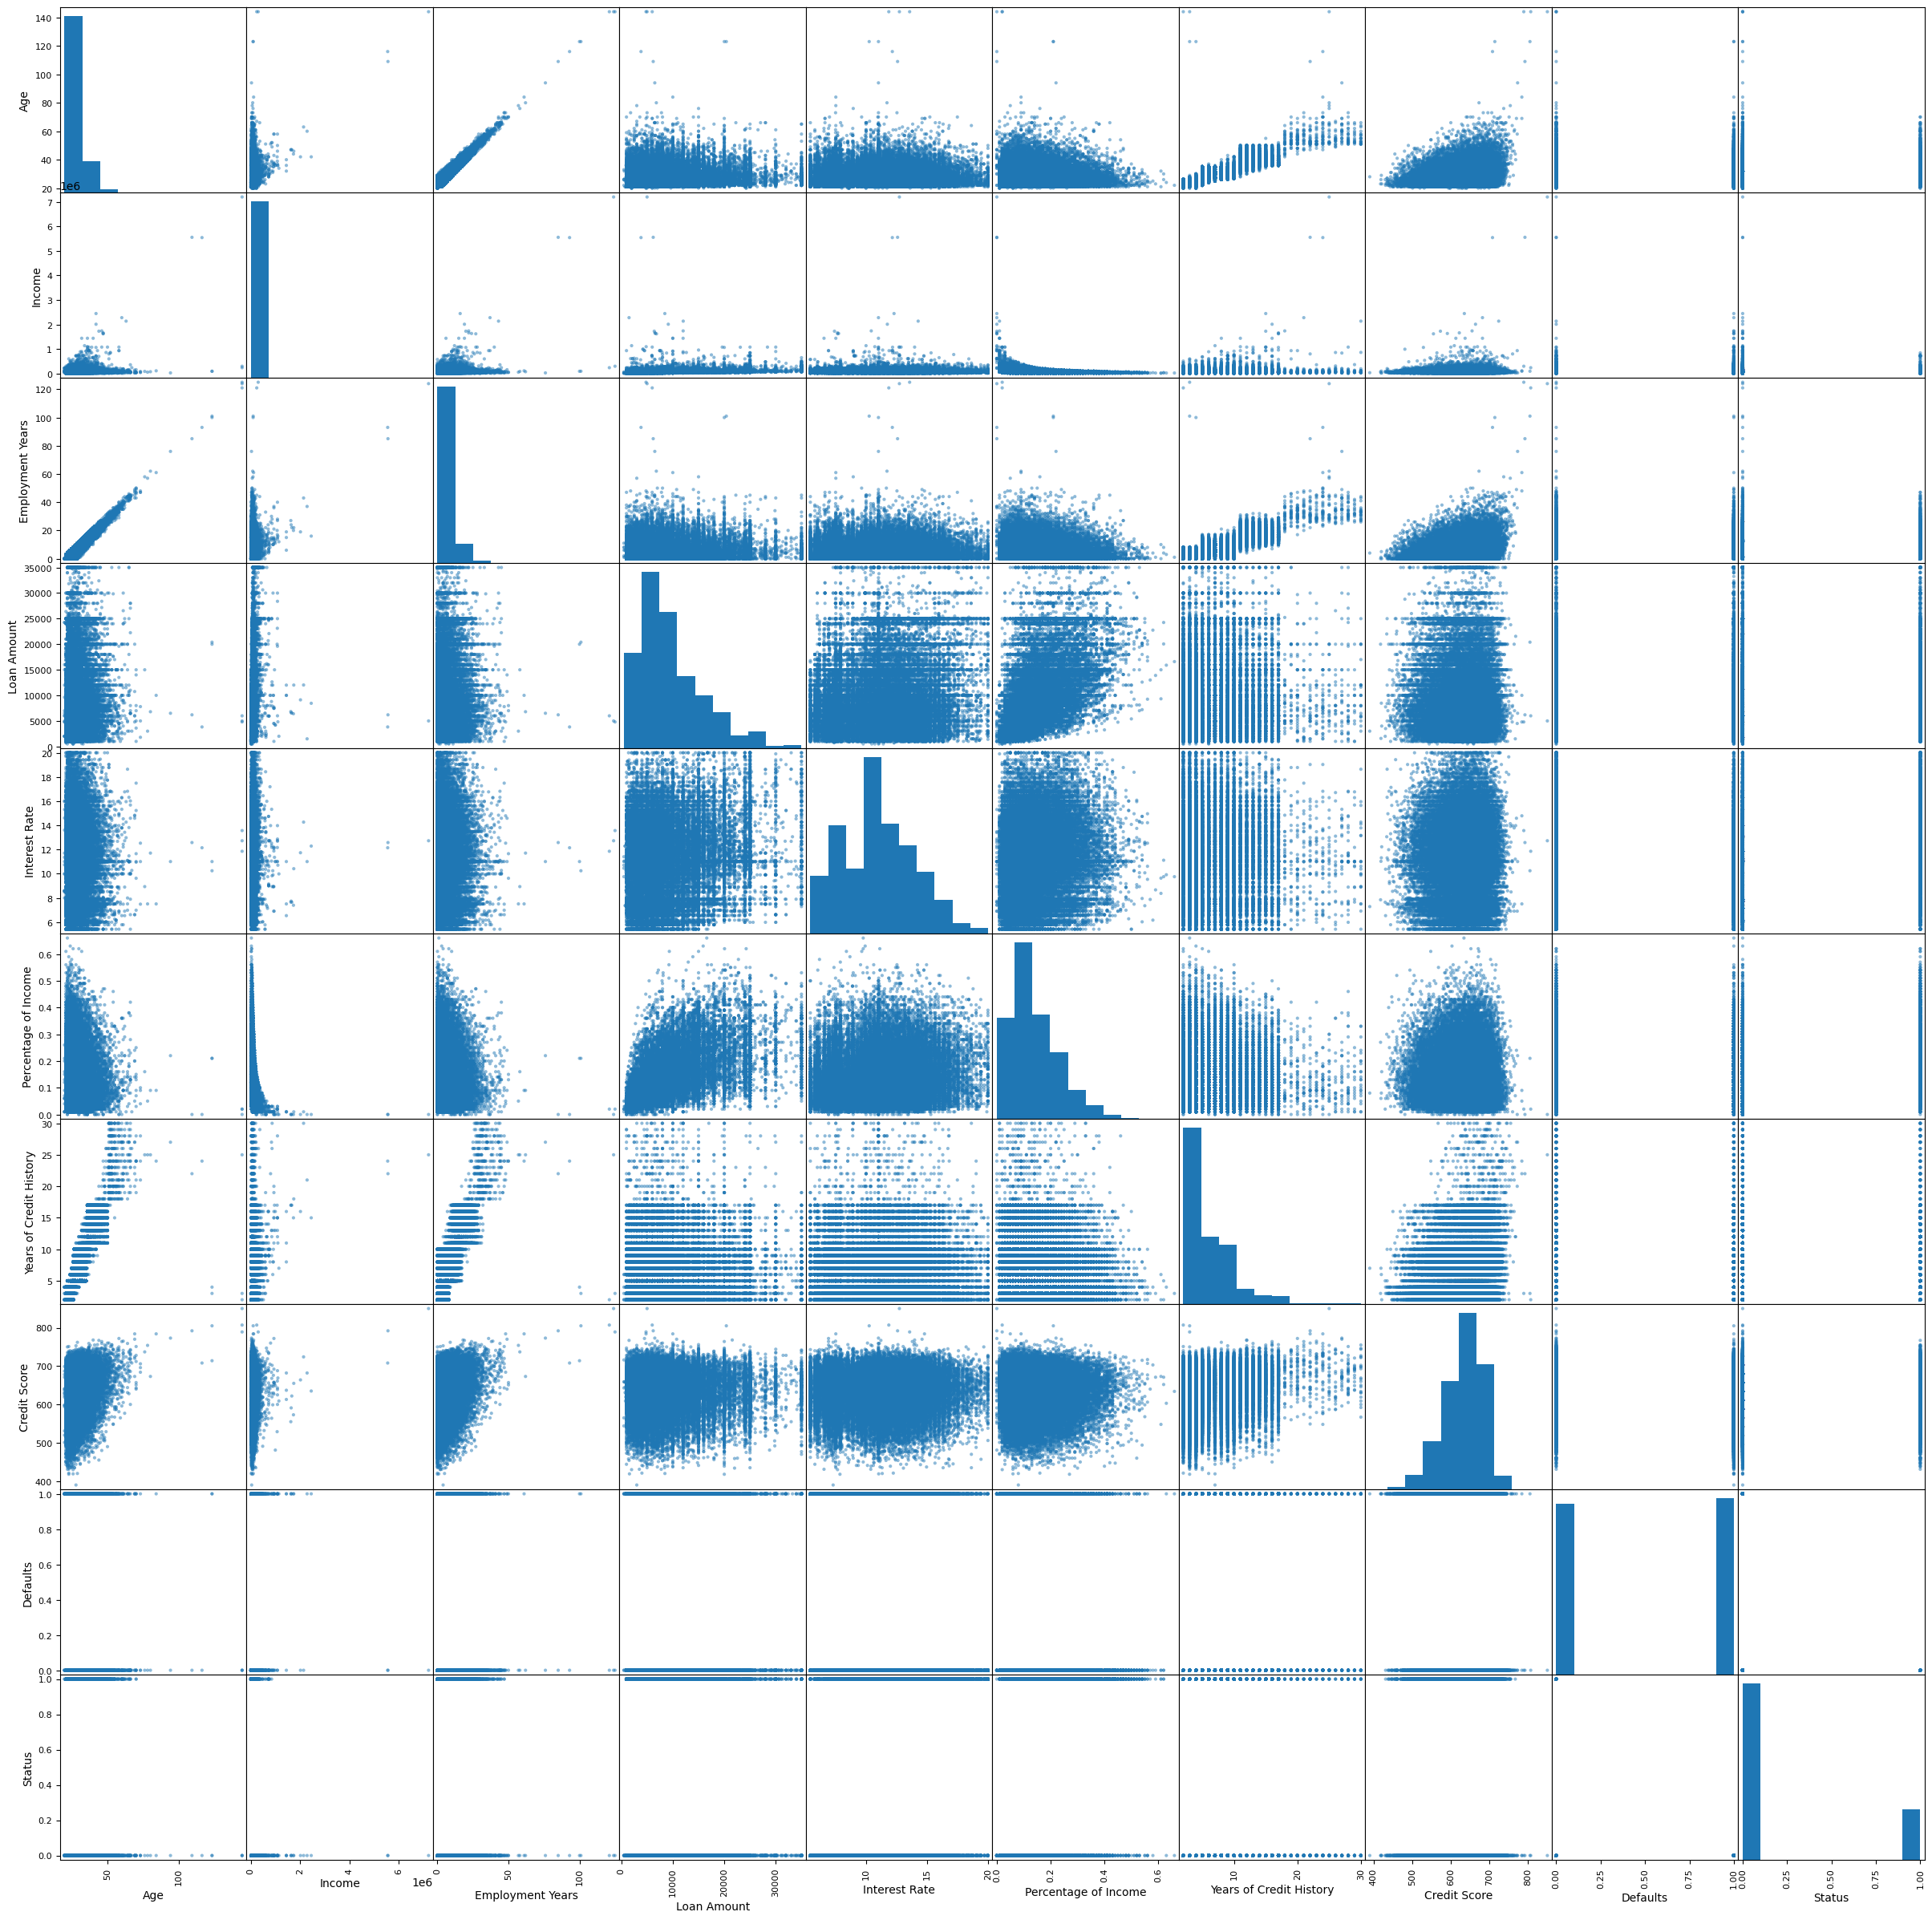

In [12]:
# create dataset with only numeric columns
numeric_df = df.select_dtypes(include = np.number)

fig, ax = plt.subplots(figsize = (30, 30))

scatter_matrix = pd.plotting.scatter_matrix(numeric_df, ax = ax, figsize = (12, 12), diagonal = 'hist')
plt.show

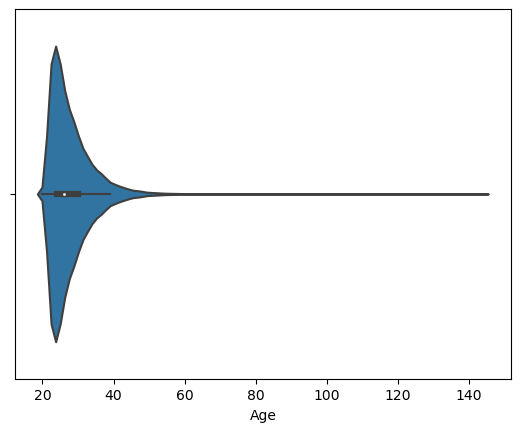

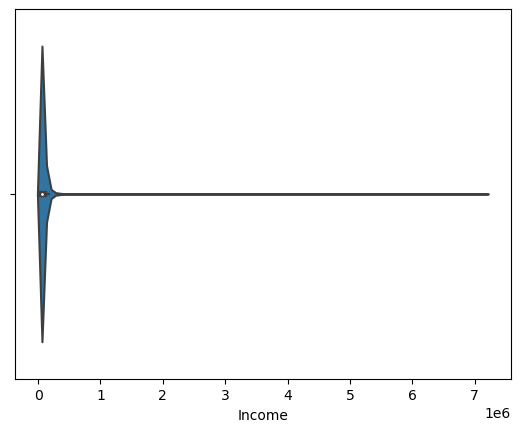

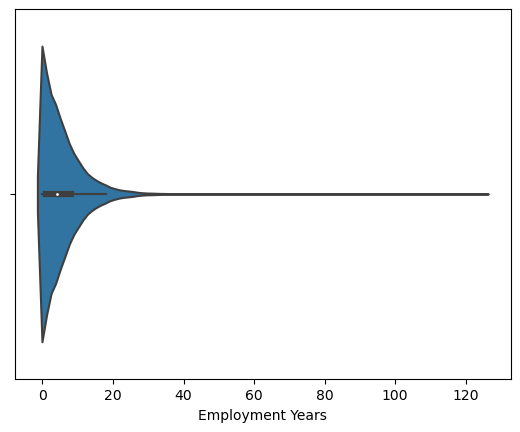

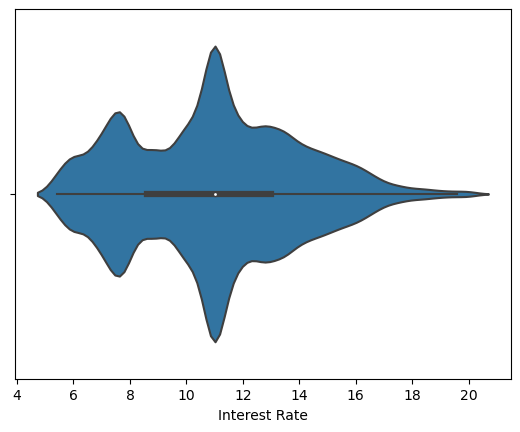

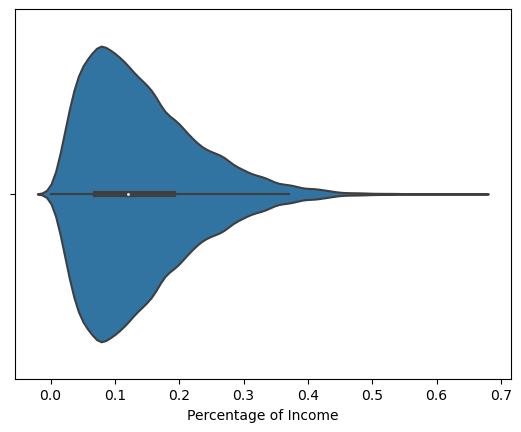

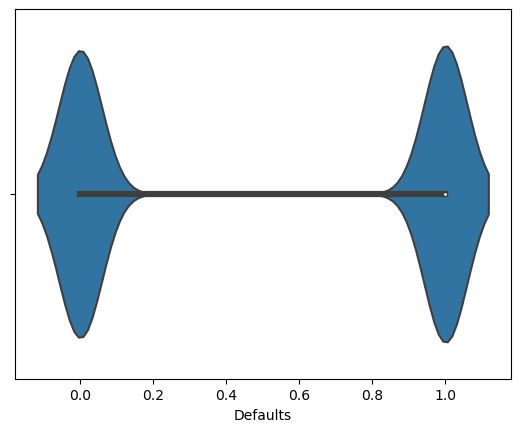

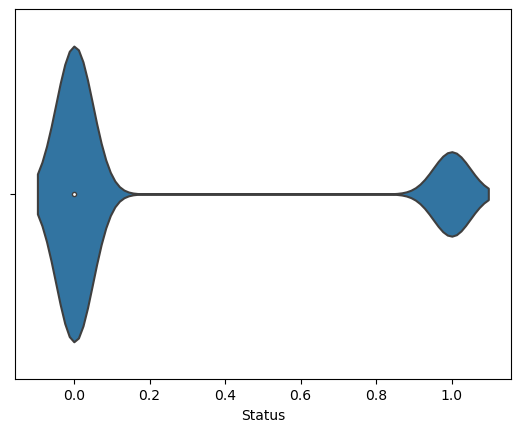

In [13]:
for col in numeric_df.columns:
    sns.violinplot(data = df, x = col)
    plt.show()

## 

## Examine Age

In [14]:
# examine perosn age
sns.boxplot(df['Age'])

<Axes: >

In [15]:
over_100 = df[df['Age'] > 100]
print('Number of people over age 100:', len(over_100))
over_100

Number of people over age 100: 7


Age     Sex Education Level     Income  Employment Years  \
81     144.0    male        Bachelor   300616.0               125   
183    144.0    male       Associate   241424.0               121   
575    123.0  female     High School    97140.0               101   
747    123.0    male        Bachelor    94723.0               100   
32297  144.0  female       Associate  7200766.0               124   
37930  116.0    male        Bachelor  5545545.0                93   
38113  109.0    male     High School  5556399.0                85   

      Home Ownership  Loan Amount Loan Intent  Interest Rate  \
81              RENT       4800.0     VENTURE          13.57   
183         MORTGAGE       6000.0   EDUCATION          11.86   
575             RENT      20400.0   EDUCATION          10.25   
747             RENT      20000.0     VENTURE          11.01   
32297       MORTGAGE       5000.0    PERSONAL          12.73   
37930       MORTGAGE       3823.0     VENTURE          12.15   
38113       MORTGAGE       6195.0     VENTURE          12.58   

       Percentage of Income  Years of Credit History  Credit Score  Defaults  \
81                     0.02                      3.0           789         0   
183                    0.02                      2.0           807         0   
575                    0.21                      3.0           805         1   
747                    0.21                      4.0           714         1   
32297                  0.00                     25.0           850         0   
37930                  0.00                     24.0           708         0   
38113                  0.00                     22.0           792         0   

       Status  
81          0  
183         0  
575         0  
747         0  
32297       0  
37930       0  
38113       0

In [16]:
# drop persons over the age of 100
df = df.drop(over_100.index, axis = 0)

In [17]:
age_sort = df.sort_values('Age', ascending = False)
age_sort.head()

Age     Sex Education Level    Income  Employment Years  \
32416  94.0    male     High School   29738.0                76   
32506  84.0    male     High School  114705.0                61   
32422  80.0    male     High School   77894.0                62   
32355  78.0    male       Associate   58463.0                57   
32534  76.0  female        Bachelor   90934.0                58   

      Home Ownership  Loan Amount Loan Intent  Interest Rate  \
32416           RENT       6500.0     MEDICAL          11.01   
32506       MORTGAGE      10000.0    PERSONAL           7.51   
32422           RENT       6800.0     MEDICAL          11.71   
32355           RENT       3000.0     MEDICAL           7.51   
32534           RENT      15000.0     MEDICAL           8.94   

       Percentage of Income  Years of Credit History  Credit Score  Defaults  \
32416                  0.22                     27.0           773         0   
32506                  0.09                     24.0           784         1   
32422                  0.09                     25.0           673         0   
32355                  0.05                     25.0           754         0   
32534                  0.16                     25.0           737         0   

       Status  
32416       0  
32506       0  
32422       0  
32355       0  
32534       0

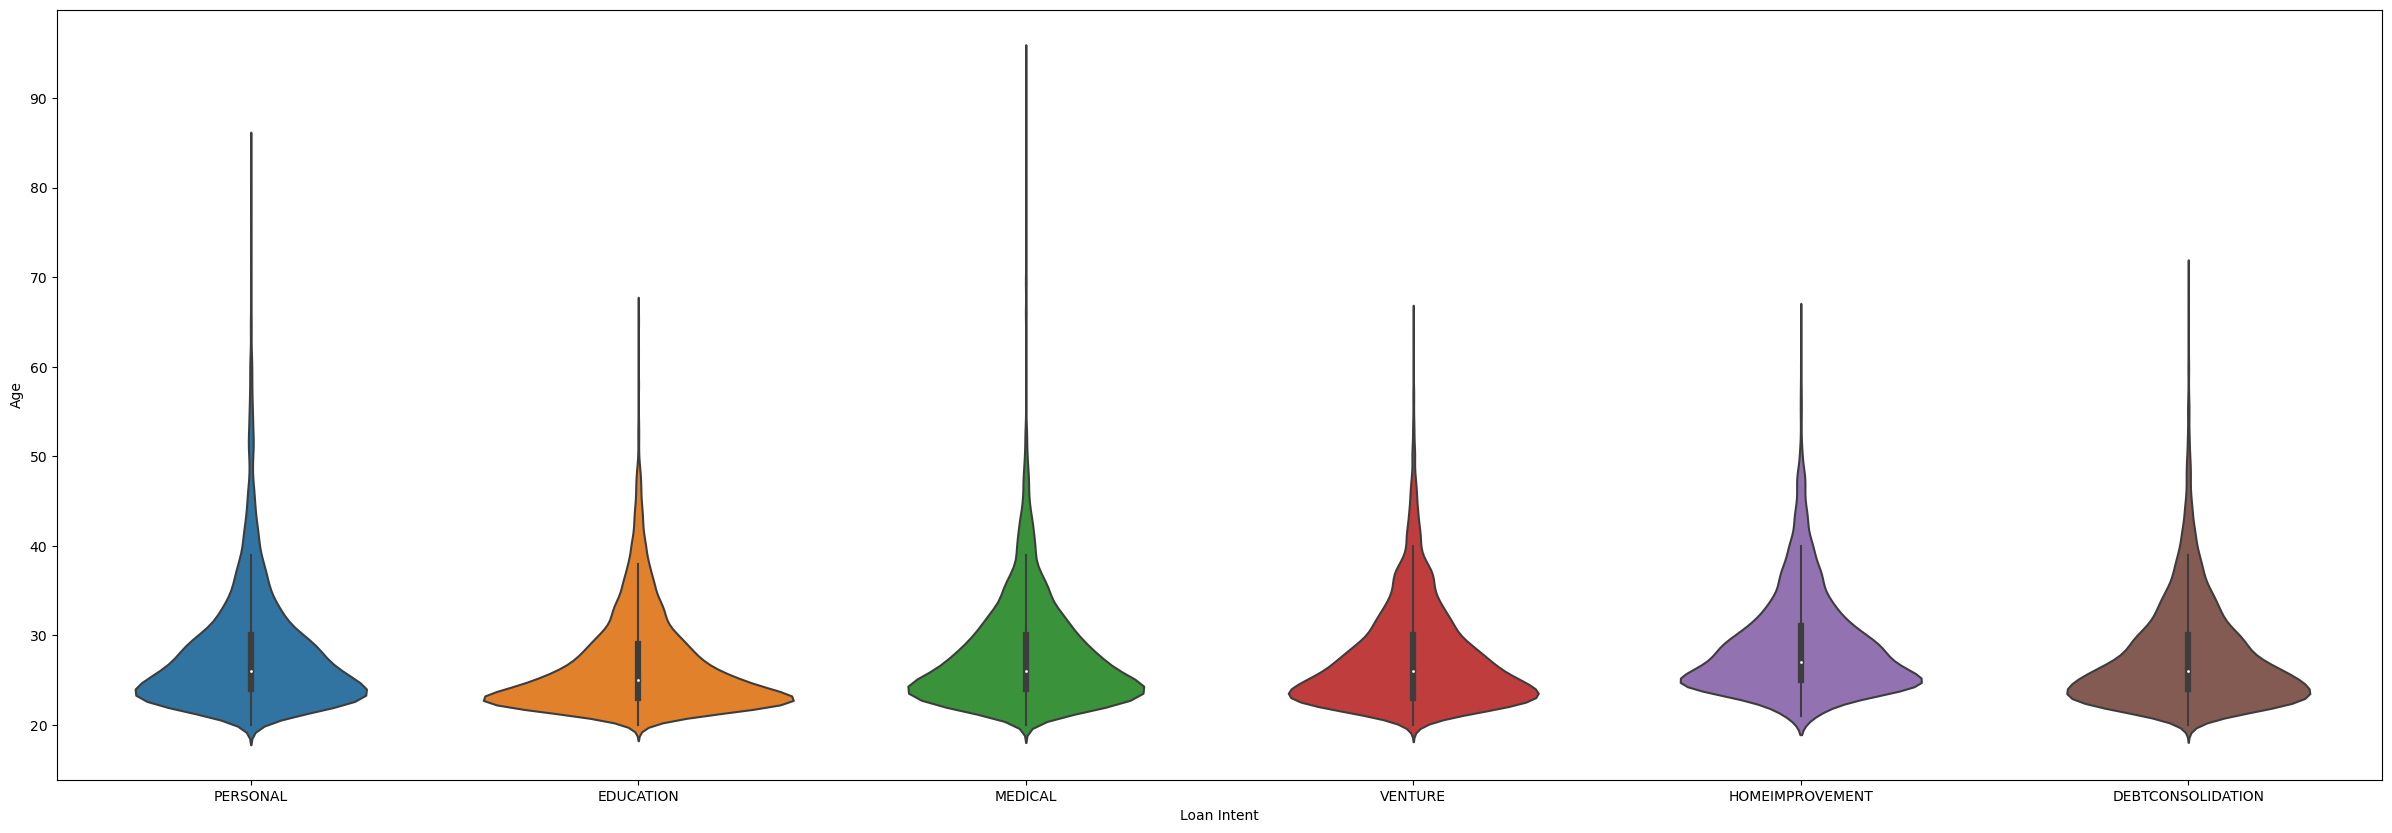

In [18]:
plt.figure(figsize=(30, 10))
sns.violinplot(data = df, x = 'Loan Intent', y = 'Age')
plt.show()

## Examine Person Income

In [19]:
sns.boxplot(df['Income'])

<Axes: >

In [20]:
income_sort = df.sort_values('Income', ascending = False)
income_sort.head(20)

Age     Sex Education Level     Income  Employment Years  \
30049  42.0    male     High School  2448661.0                16   
32546  60.0  female     High School  2280980.0                37   
32497  63.0    male     High School  2139143.0                43   
37175  42.0    male     High School  2012954.0                19   
41288  46.0    male       Associate  1741243.0                22   
31924  44.0    male     High School  1728974.0                20   
35850  47.0    male       Associate  1661567.0                22   
31922  47.0    male     High School  1635757.0                24   
33132  47.0    male       Associate  1621992.0                27   
29119  36.0    male       Doctorate  1440982.0                15   
29120  40.0  female        Bachelor  1440915.0                19   
17833  32.0  female     High School  1440746.0                 6   
17834  34.0    male        Bachelor  1138723.0                12   
35739  36.0  female        Bachelor  1097671.0                16   
29122  36.0  female     High School  1081254.0                14   
31921  37.0    male       Associate  1081139.0                15   
29121  50.0    male     High School  1081082.0                28   
40161  46.0    male     High School  1080952.0                27   
32298  58.0    male          Master  1080918.0                40   
39853  39.0    male     High School  1076036.0                17   

      Home Ownership  Loan Amount        Loan Intent  Interest Rate  \
30049           RENT       8450.0            VENTURE          12.29   
32546       MORTGAGE       1500.0           PERSONAL          11.01   
32497           RENT      12025.0          EDUCATION          14.27   
37175       MORTGAGE       9121.0            VENTURE          11.74   
41288       MORTGAGE      12011.0            VENTURE          10.42   
31924       MORTGAGE       6400.0  DEBTCONSOLIDATION           7.40   
35850       MORTGAGE       6545.0            MEDICAL           7.65   
31922       MORTGAGE       6600.0            VENTURE           7.74   
33132       MORTGAGE       6835.0            MEDICAL           7.66   
29119            OWN      10000.0            MEDICAL           6.54   
29120       MORTGAGE      10000.0            MEDICAL          11.01   
17833       MORTGAGE      12000.0            VENTURE           7.51   
17834       MORTGAGE       2000.0           PERSONAL           9.99   
35739       MORTGAGE       4824.0           PERSONAL          10.71   
29122       MORTGAGE       6000.0           PERSONAL          11.01   
31921       MORTGAGE      25000.0           PERSONAL          12.87   
29121       MORTGAGE      30000.0  DEBTCONSOLIDATION          12.69   
40161       MORTGAGE      28389.0           PERSONAL          12.75   
32298           RENT      19600.0  DEBTCONSOLIDATION          13.98   
39853       MORTGAGE      23116.0           PERSONAL          12.17   

       Percentage of Income  Years of Credit History  Credit Score  Defaults  \
30049                  0.00                     15.0           635         1   
32546                  0.00                     21.0           682         1   
32497                  0.01                     30.0           724         0   
37175                  0.00                     16.0           664         0   
41288                  0.01                     18.0           655         1   
31924                  0.00                     15.0           573         1   
35850                  0.00                     17.0           622         1   
31922                  0.00                     17.0           591         1   
33132                  0.00                     17.0           555         1   
29119                  0.01                     11.0           682         1   
29120                  0.01                     16.0           637         1   
17833                  0.01                      8.0           613         0   
17834                  0.00                    

## Categorical Variables

In [21]:
categorical_df = df.select_dtypes(include = object)

Sex
female    20157
male      24836
Name: Status, dtype: int64 




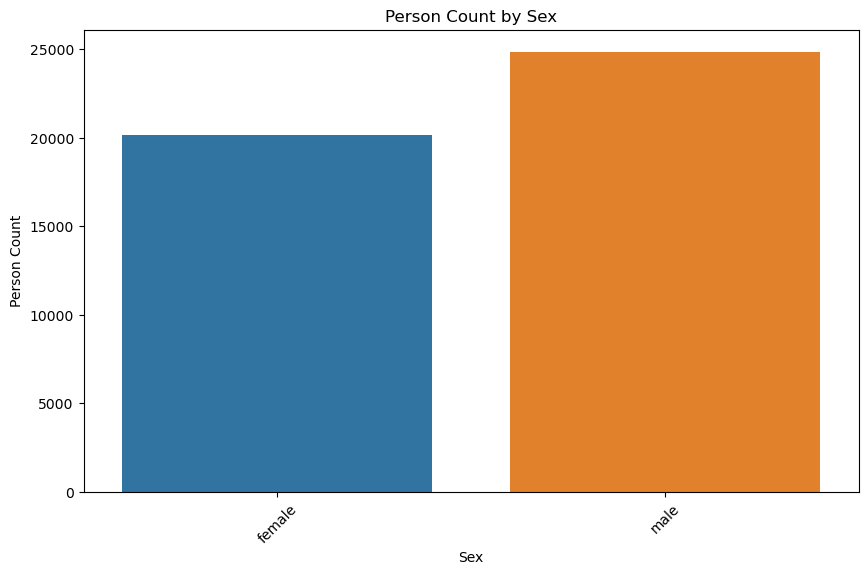

Education Level
Associate      12026
Bachelor       13396
Doctorate        621
High School    11970
Master          6980
Name: Status, dtype: int64 




Home Ownership
MORTGAGE    18485
OTHER         117
OWN          2951
RENT        23440
Name: Status, dtype: int64 




Loan Intent
DEBTCONSOLIDATION    7145
EDUCATION            9151
HOMEIMPROVEMENT      4783
MEDICAL              8548
PERSONAL             7551
VENTURE              7815
Name: Status, dtype: int64 




In [22]:
for col in categorical_df.columns:
    temp = df.groupby(col)['Status'].count()
    print(temp, '\n\n')

    # Plot the counts as a bar chart
    plt.figure(figsize = (10, 6))
    sns.barplot(x = temp.index, y = temp.values)
    plt.title(f'Person Count by {col}')
    plt.xlabel(col)
    plt.ylabel('Person Count')
    plt.xticks(rotation = 45)  # Rotate x-axis labels if needed for readability
    plt.show()

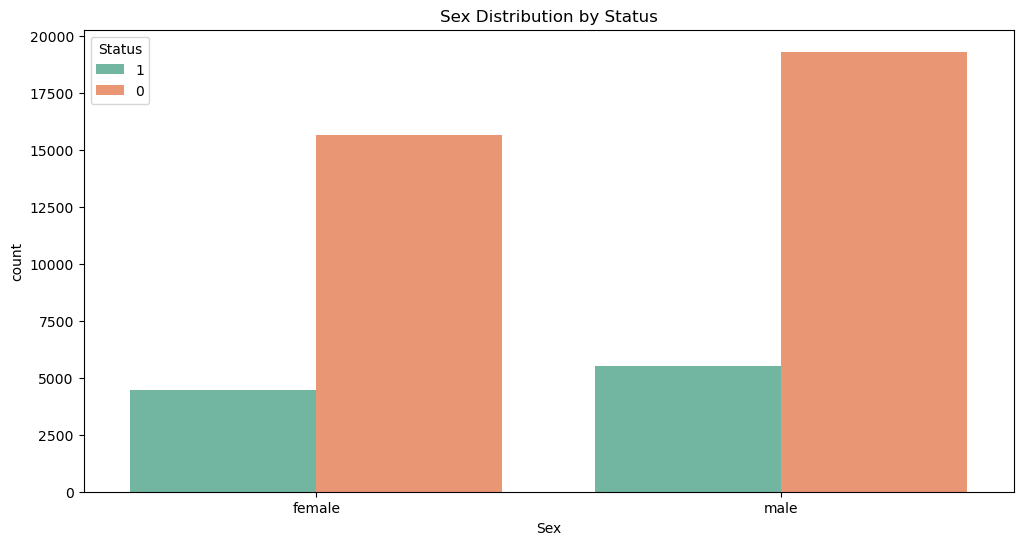

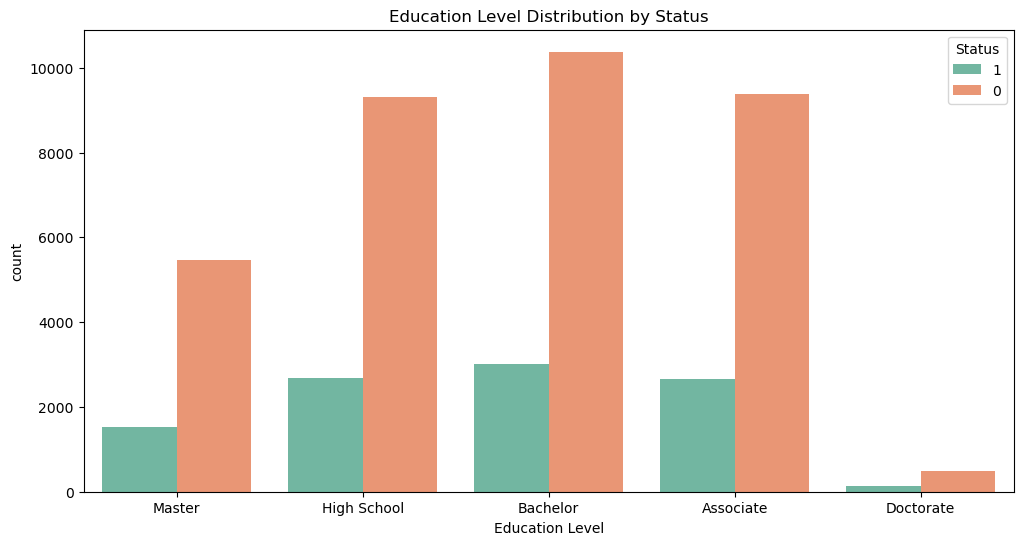

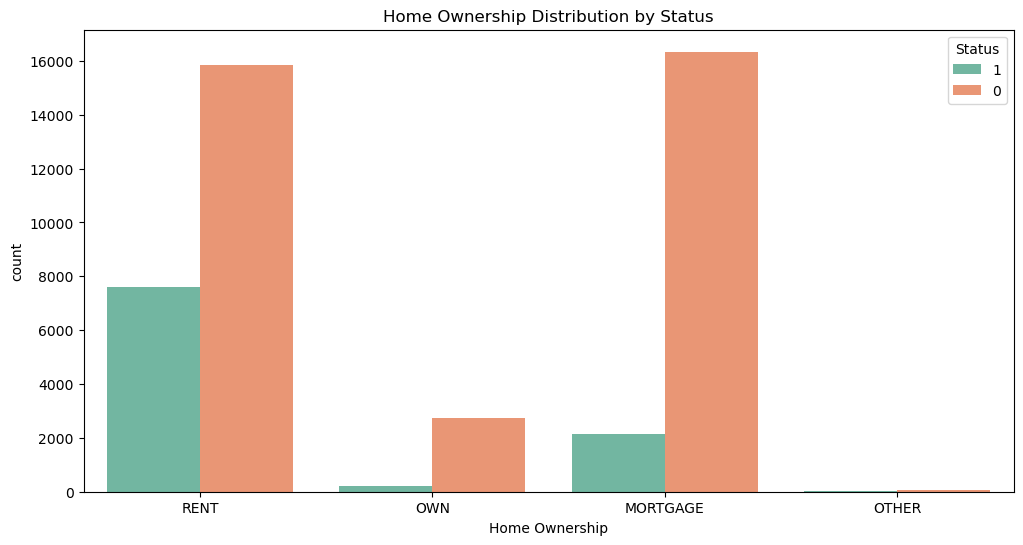

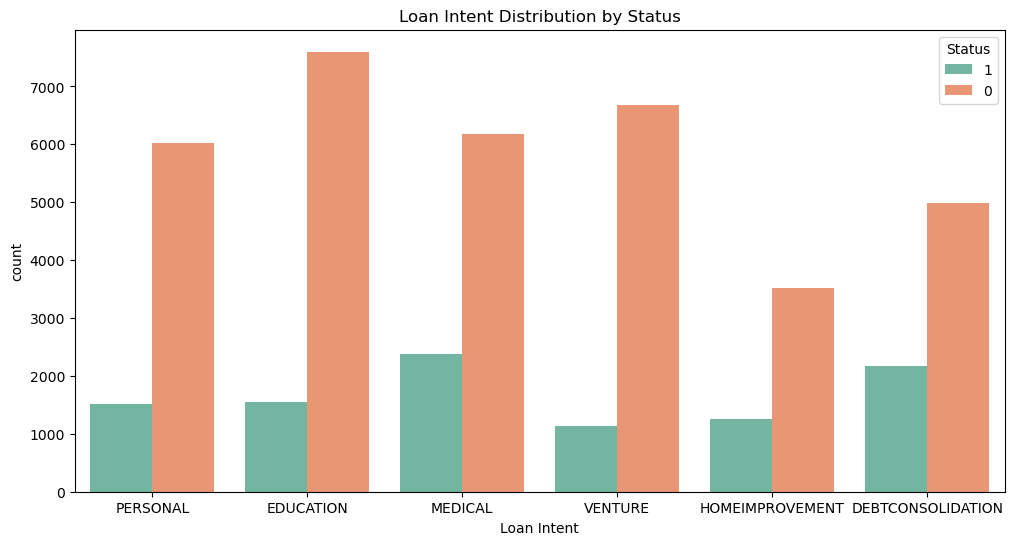

In [23]:
# temporarily convert status to string
df['Status'] = df['Status'].astype('str')

for col in categorical_df.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data = df, x = col, hue = 'Status', palette = 'Set2')
    plt.title(f'{col} Distribution by Status')
    plt.show()

In [24]:
temp = df.groupby('Home Ownership')['Credit Score'].mean()
print(temp, '\n\n')

plt.figure(figsize = (10, 6))
sns.barplot(x = temp.index, y = temp.values)
plt.title(f'Mean Credit Score by Home Ownership Status')
plt.xlabel('Home Ownership Status')
plt.ylabel('Average Score')
plt.xticks(rotation = 45)  # Rotate x-axis labels if needed for readability
plt.show()

Home Ownership
MORTGAGE    633.002975
OTHER       627.803419
OWN         632.058285
RENT        632.346928
Name: Credit Score, dtype: float64 




In [25]:
# convert status back to int
df['Status'] = df['Status'].astype('category').cat.codes

## Investigate Statistical Significance of Categorical Variables

In [26]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

In [27]:
# make a duplicate dataset of categorical features where features have been one-hot encoded
dummies_df = pd.get_dummies(categorical_df)

In [28]:
for col in dummies_df.columns:
    # contingency table
    contingency_table = pd.crosstab(dummies_df[col], df['Status'])
    print(f'Contingency table for {col}:\n{contingency_table}\n')
    # chi-square test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f'Chi-square test results for {col}:\n\tChi-square statistic: {chi2_stat: .2f}\n\tP-value: {p_value:.4f}\n\tDegrees of Freedom: {dof}\n\tExpected Frequencies:\n{expected}\n')
    if p_value > .05:
        print(f'No significant association between {col} and Status\n')
    else:
        print(f'There is a statistically significant relationship between {col} and Status\n')
    print('-----------------------------------------------------------------')

Contingency table for Sex_female:
Status          0     1
Sex_female             
False       19321  5515
True        15672  4485

Chi-square test results for Sex_female:
	Chi-square statistic:  0.01
	P-value: 0.9188
	Degrees of Freedom: 1
	Expected Frequencies:
[[19316.03022692  5519.96977308]
 [15676.96977308  4480.03022692]]

No significant association between Sex_female and Status

-----------------------------------------------------------------
Contingency table for Sex_male:
Status        0     1
Sex_male             
False     15672  4485
True      19321  5515

Chi-square test results for Sex_male:
	Chi-square statistic:  0.01
	P-value: 0.9188
	Degrees of Freedom: 1
	Expected Frequencies:
[[15676.96977308  4480.03022692]
 [19316.03022692  5519.96977308]]

No significant association between Sex_male and Status

-----------------------------------------------------------------
Contingency table for Education Level_Associate:
Status                         0     1
Education Level_

#### Results:
* Sex is not a relevant feature
* Education level is not a relevant feature
* Home Ownership is a relevant feature
* Loan Intent is a relevant feature

## Correlation

In [29]:
# correlation matrix for numeric features
corr = numeric_df.corr()
corr

Age    Income  Employment Years  Loan Amount  \
Age                      1.000000  0.193698          0.954412     0.050750   
Income                   0.193698  1.000000          0.185987     0.242290   
Employment Years         0.954412  0.185987          1.000000     0.044589   
Loan Amount              0.050750  0.242290          0.044589     1.000000   
Interest Rate            0.013402  0.001510          0.016631     0.146093   
Percentage of Income    -0.043299 -0.234177         -0.039862     0.593011   
Years of Credit History  0.861985  0.124316          0.824272     0.042969   
Credit Score             0.178432  0.035919          0.186196     0.009074   
Defaults                -0.025917  0.061483         -0.029231    -0.059009   
Status                  -0.021476 -0.135808         -0.020481     0.107714   

                         Interest Rate  Percentage of Income  \
Age                           0.013402             -0.043299   
Income                        0.001510             -0.234177   
Employment Years              0.016631             -0.039862   
Loan Amount                   0.146093              0.593011   
Interest Rate                 1.000000              0.125209   
Percentage of Income          0.125209              1.000000   
Years of Credit History       0.018008             -0.031868   
Credit Score                  0.011498             -0.011483   
Defaults                     -0.181800             -0.203252   
Status                        0.332005              0.384880   

                         Years of Credit History  Credit Score  Defaults  \
Age                                     0.861985      0.178432 -0.025917   
Income                                  0.124316      0.035919  0.061483   
Employment Years                        0.824272      0.186196 -0.029231   
Loan Amount                             0.042969      0.009074 -0.059009   
Interest Rate                           0.018008      0.011498 -0.181800   
Percentage of Income                   -0.031868     -0.011483 -0.203252   
Years of Credit History                 1.000000      0.155204 -0.022640   
Credit Score                            0.155204      1.000000 -0.183005   
Defaults                               -0.022640     -0.183005  1.000000   
Status                                 -0.014851     -0.007647 -0.543096   

                           Status  
Age                     -0.021476  
Income                  -0.135808  
Employment Years        -0.020481  
Loan Amount              0.107714  
Interest Rate            0.332005  
Percentage of Income     0.384880  
Years of Credit History -0.014851  
Credit Score            -0.007647  
Defaults                -0.543096  
Status                   1.000000

In [30]:
sns.heatmap(corr, annot = True, fmt = '.2', cmap = 'RdYlBu', annot_kws={'size': 7}, square = True)

<Axes: >

In [31]:
# correlation matrix for relevant categorical variables
dummies_cols = ['Home Ownership_RENT', 'Home Ownership_OTHER', 'Home Ownership_MORTGAGE', 
                'Home Ownership_OWN', 'Loan Intent_DEBTCONSOLIDATION', 'Loan Intent_EDUCATION',
                'Loan Intent_HOMEIMPROVEMENT', 'Loan Intent_MEDICAL', 'Loan Intent_PERSONAL',
                'Loan Intent_VENTURE']
cat_corr_df = pd.concat([df['Status'], dummies_df[dummies_cols]], axis = 1)

cat_corr = cat_corr_df.corr()
cat_corr

Status  Home Ownership_RENT  \
Status                         1.000000             0.255249   
Home Ownership_RENT            0.255249             1.000000   
Home Ownership_OTHER           0.013642            -0.053249   
Home Ownership_MORTGAGE       -0.213447            -0.870856   
Home Ownership_OWN            -0.093691            -0.276292   
Loan Intent_DEBTCONSOLIDATION  0.084097             0.031122   
Loan Intent_EDUCATION         -0.063996             0.002498   
Loan Intent_HOMEIMPROVEMENT    0.033810            -0.054966   
Loan Intent_MEDICAL            0.065158             0.061668   
Loan Intent_PERSONAL          -0.022495            -0.014387   
Loan Intent_VENTURE           -0.085925            -0.037624   

                               Home Ownership_OTHER  Home Ownership_MORTGAGE  \
Status                                     0.013642                -0.213447   
Home Ownership_RENT                       -0.053249                -0.870856   
Home Ownership_OTHER                       1.000000                -0.042639   
Home Ownership_MORTGAGE                   -0.042639                 1.000000   
Home Ownership_OWN                        -0.013528                -0.221240   
Loan Intent_DEBTCONSOLIDATION             -0.001886                 0.016011   
Loan Intent_EDUCATION                     -0.006284                -0.003436   
Loan Intent_HOMEIMPROVEMENT               -0.000620                 0.050703   
Loan Intent_MEDICAL                       -0.001366                -0.054340   
Loan Intent_PERSONAL                       0.002761                 0.011814   
Loan Intent_VENTURE                        0.007693                -0.008434   

                               Home Ownership_OWN  \
Status                                  -0.093691   
Home Ownership_RENT                     -0.276292   
Home Ownership_OTHER                    -0.013528   
Home Ownership_MORTGAGE                 -0.221240   
Home Ownership_OWN                       1.000000   
Loan Intent_DEBTCONSOLIDATION           -0.094233   
Loan Intent_EDUCATION                    0.003079   
Loan Intent_HOMEIMPROVEMENT              0.010280   
Loan Intent_MEDICAL                     -0.016168   
Loan Intent_PERSONAL                     0.004984   
Loan Intent_VENTURE                      0.091102   

                               Loan Intent_DEBTCONSOLIDATION  \
Status                                              0.084097   
Home Ownership_RENT                                 0.031122   
Home Ownership_OTHER                               -0.001886   
Home Ownership_MORTGAGE                             0.016011   
Home Ownership_OWN                                 -0.094233   
Loan Intent_DEBTCONSOLIDATION                       1.000000   
Loan Intent_EDUCATION                              -0.219542   
Loan Intent_HOMEIMPROVEMENT                        -0.149852   
Loan Intent_MEDICAL                                -0.210423   
Loan Intent_PERSONAL                               -0.195120   
Loan Intent_VENTURE                                -0.199205   

                               Loan Intent_EDUCATION  \
Status                                     -0.063996   
Home Ownership_RENT                         0.002498   
Home Ownership_OTHER                       -0.006284   
Home Ownership_MORTGAGE                    -0.003436   
Home Ownership_OWN                          0.003079   
Loan Intent_DEBTCONSOLIDATION              -0.219542   
Loan Intent_EDUCATION                       1.000000   
Loan Intent_HOMEIMPROVEMENT                -0.174269   
Loan Intent_MEDICAL                        -0.244710   
Loan Intent_PERSONAL                       -0.226914   
Loan Intent_VENTURE                        -0.231665   

                               Loan Intent_HOMEIMPROVEMENT  \
Status                                            0.033810   
Home Ownership_RENT                              -0.054966   
Home Ownership_OTHER                  

<Axes: >

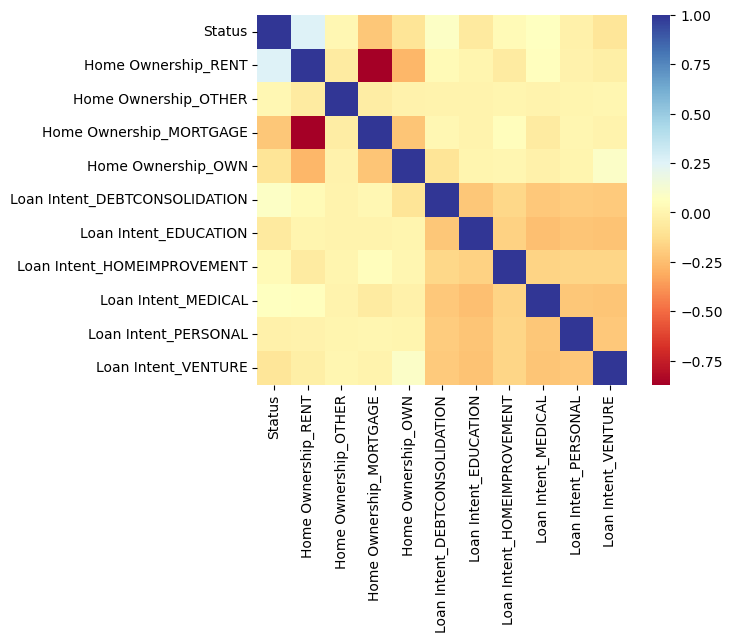

In [32]:
sns.heatmap(cat_corr,  fmt = '.2', cmap = 'RdYlBu', annot_kws={'size': 7}, square = True)

#### Results:
__Highly Correlated Numeric Features__
* Income
* Interest Rate
* Percentage of Income
* Defaults

__Highly Correlated Categorical Features__
* Home Ownership: Rent
* Home Ownership: Mortgage  
(These are highly correlated with one another)
* Loan Intent: Venture

# Preprocessing

In [33]:
df.describe()

Age        Income  Employment Years   Loan Amount  \
count  44993.000000  4.499300e+04      44993.000000  44993.000000   
mean      27.748428  7.990845e+04          5.394528   9583.176761   
std        5.909737  6.332213e+04          5.927159   6314.802655   
min       20.000000  8.000000e+03          0.000000    500.000000   
25%       24.000000  4.719500e+04          1.000000   5000.000000   
50%       26.000000  6.704600e+04          4.000000   8000.000000   
75%       30.000000  9.577800e+04          8.000000  12237.000000   
max       94.000000  2.448661e+06         76.000000  35000.000000   

       Interest Rate  Percentage of Income  Years of Credit History  \
count   44993.000000          44993.000000             44993.000000   
mean       11.006448              0.139736                 5.866557   
std         2.978985              0.087207                 3.877167   
min         5.420000              0.000000                 2.000000   
25%         8.590000              0.070000                 3.000000   
50%        11.010000              0.120000                 4.000000   
75%        12.990000              0.190000                 8.000000   
max        20.000000              0.660000                30.000000   

       Credit Score      Defaults        Status  
count  44993.000000  44993.000000  44993.000000  
mean     632.585713      0.507990      0.222257  
std       50.402411      0.499942      0.415767  
min      390.000000      0.000000      0.000000  
25%      601.000000      0.000000      0.000000  
50%      640.000000      1.000000      0.000000  
75%      670.000000      1.000000      0.000000  
max      784.000000      1.000000      1.000000

## Split Data

In [34]:
# split data into training and test set
from sklearn.model_selection import train_test_split

X = df.drop(['Status'], axis = 1)
y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

In [35]:
# split into validation set
X = X_train
y = y_train

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 11)

In [36]:
print(f'Training set size: {len(X_train)}')
print(f'Validation set size: {len(X_val)}')
print(f'Testing set size: {len(X_test)}')

Training set size: 28795
Validation set size: 7199
Testing set size: 8999


## Determine Standardizing methods

## Plot Histograms

C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


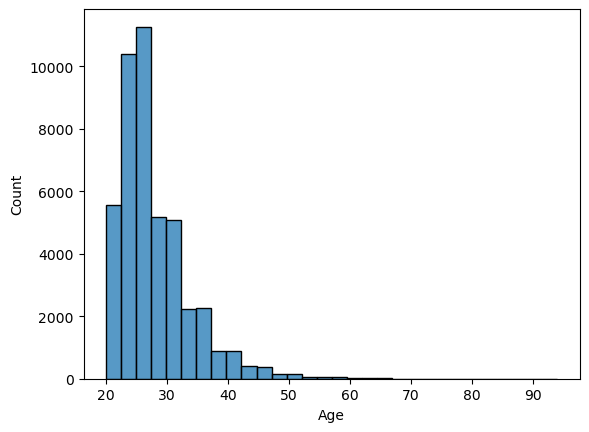

C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


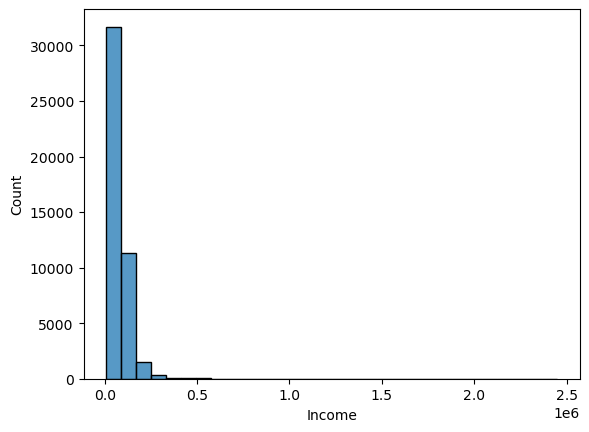

C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


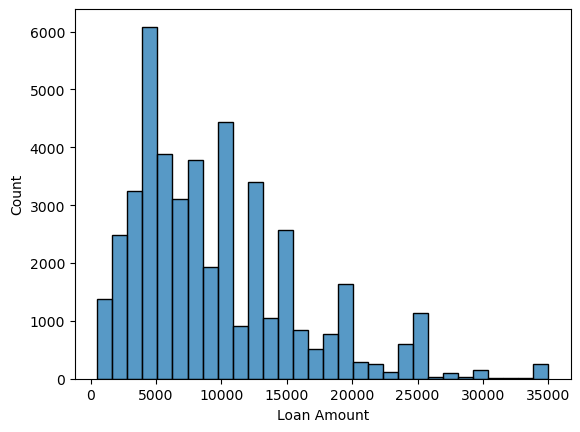

C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


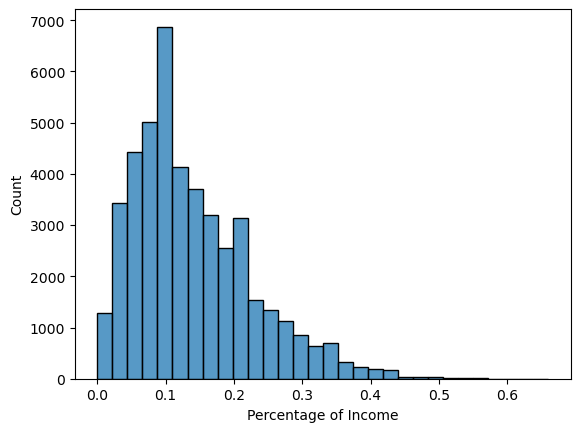

C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


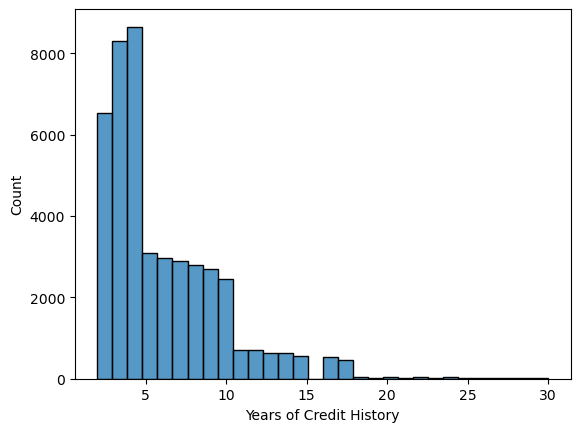

C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


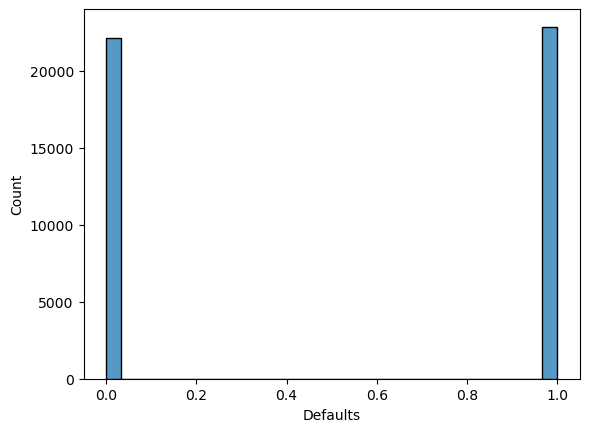

C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


In [37]:
for col in numeric_df.columns:
    sns.histplot(data = df, x = col, bins = 30)
    plt.show()

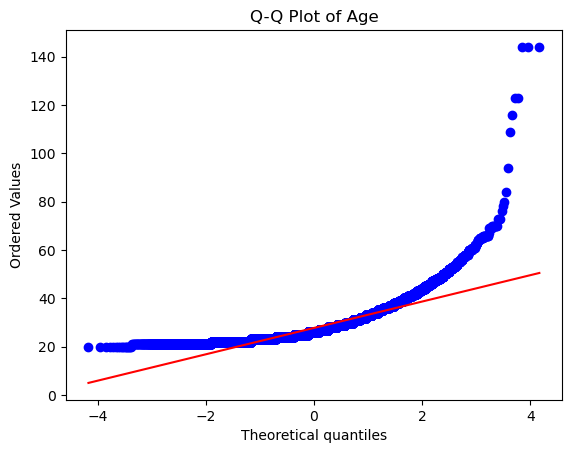

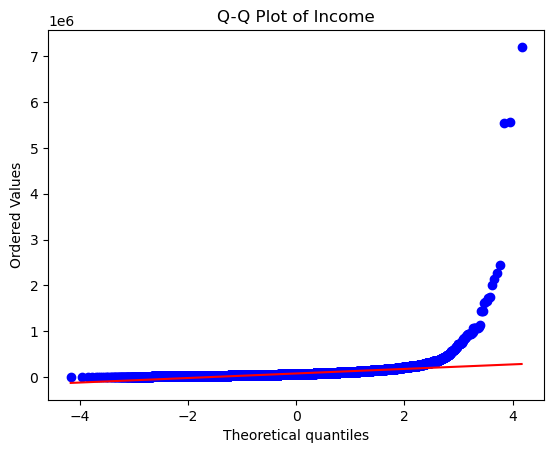

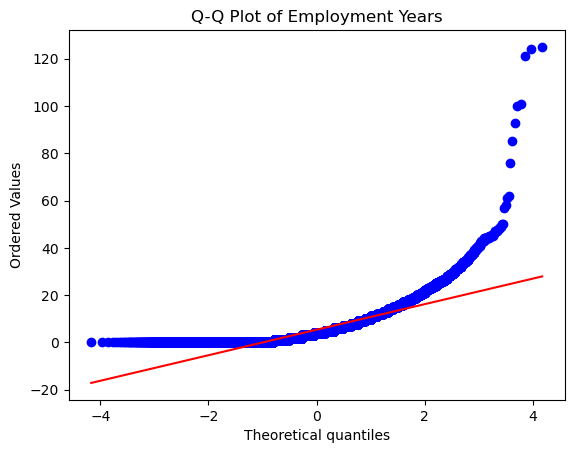

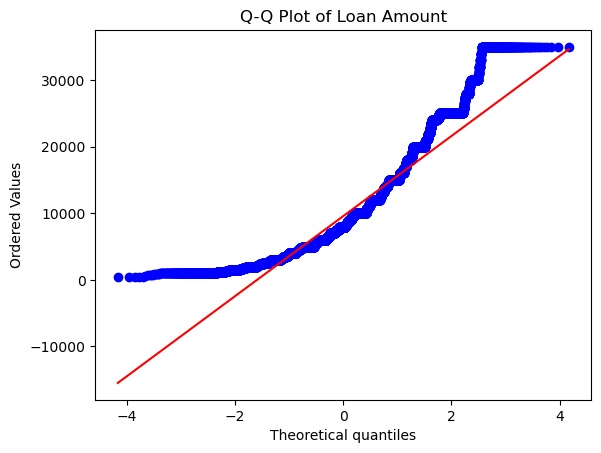

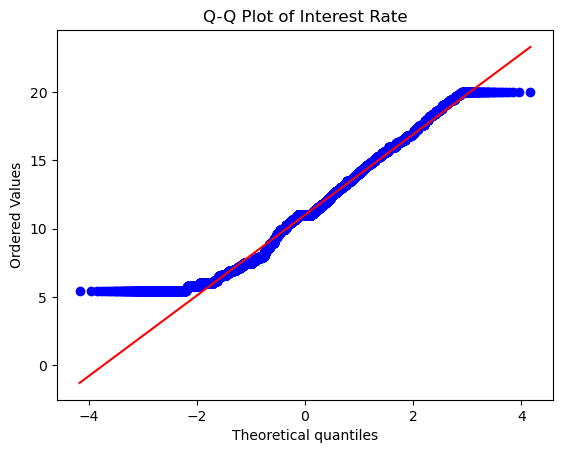

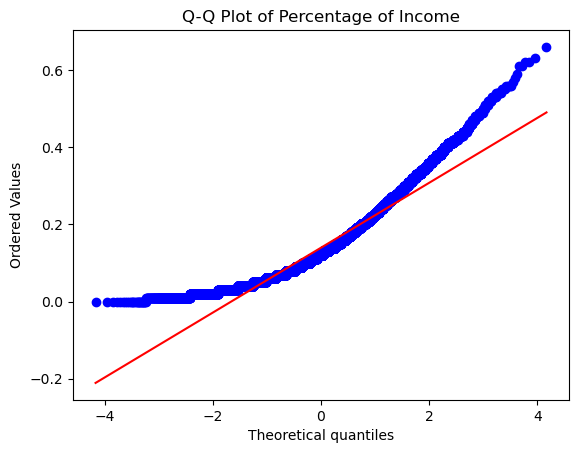

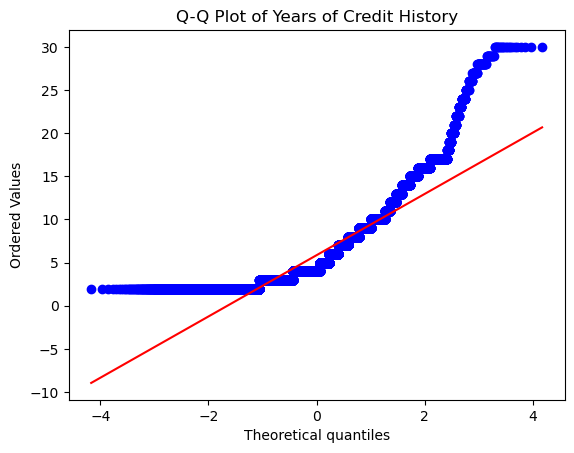

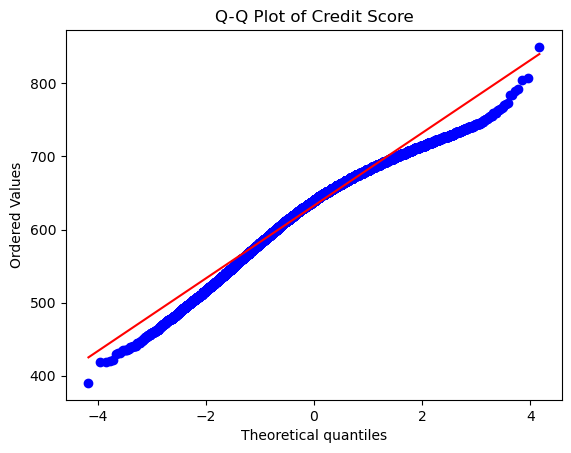

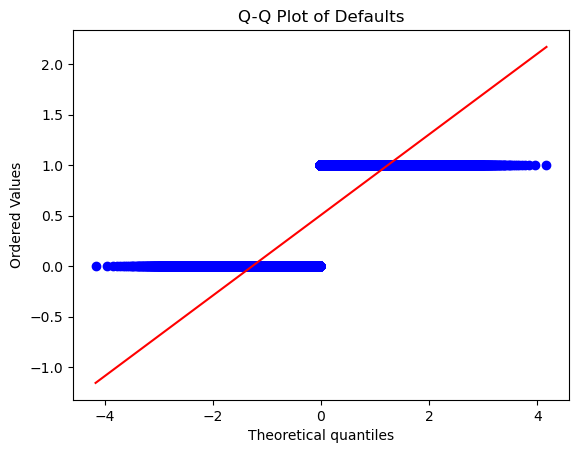

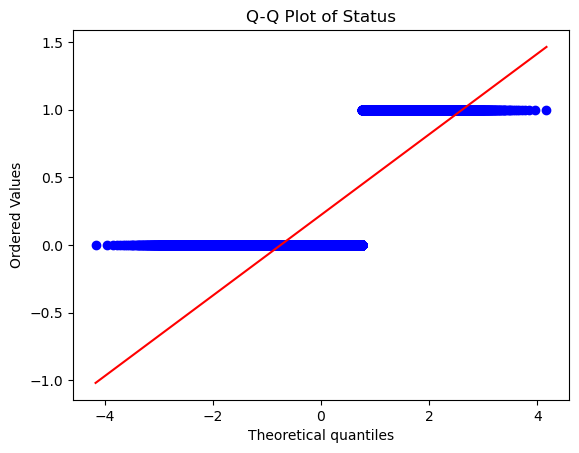

In [38]:
# first investigate distribution of features
# credit score is definitely gaussian
# age, income, employment years are definitely pareto
# investigate the remaining numeric features
import scipy.stats as stats
# create Q-Q plots
# plots that closely follow red line indicate gaussian distribution
for col in numeric_df.columns:
    stats.probplot(numeric_df[col], dist = "norm", plot = plt)
    plt.title(f"Q-Q Plot of {col}")
    plt.show()

In [39]:
# Examine skew values
# gaussian distributions will have a value close to 0
print(numeric_df.skew())

Age                         2.548154
Income                     34.137583
Employment Years            2.594917
Loan Amount                 1.179731
Interest Rate               0.213784
Percentage of Income        1.034512
Years of Credit History     1.631720
Credit Score               -0.610261
Defaults                   -0.031827
Status                      1.336351
dtype: float64


In [40]:
# Examine kurtosis values
# gaussian distributions will have a value around 3, high values indicates large tails
print(numeric_df.kurtosis())

Age                          18.649449
Income                     2398.684769
Employment Years             19.168324
Loan Amount                   1.351215
Interest Rate                -0.420335
Percentage of Income          1.082416
Years of Credit History       3.725945
Credit Score                  0.203022
Defaults                     -1.999076
Status                       -0.214176
dtype: float64


### Distribution Conclusions
Gaussian requirments: fairly straight Q-Q graph, skew value between about -1 and 1, kurtosis value around 3
* Age: pareto
* Income: pareto
* Employment Years: pareto
* Loan Amount: gaussian
* Interest Rate: gaussian
* Percentage of Income: gaussian
* Years of Credit History: pareto
* Credit Score: gaussian
* Status: N/A

## Standardize Train and Test

In [41]:
# separate gaussian and pareto features
gaussian_features = ['Loan Amount', 'Interest Rate', 'Percentage of Income', 'Credit Score', 'Defaults']
pareto_features = ['Age', 'Income', 'Employment Years', 'Years of Credit History']

In [42]:
from sklearn.preprocessing import StandardScaler, RobustScaler
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()

In [43]:
# scale training data
X_train_standard = standard_scaler.fit_transform(X_train[gaussian_features])
X_train_robust = robust_scaler.fit_transform(X_train[pareto_features])

# combine training data
X_train_scaled = pd.DataFrame(data = np.hstack([X_train_standard, X_train_robust]), columns = gaussian_features + pareto_features)

In [44]:
# scale validation data
X_val_standard = standard_scaler.fit_transform(X_val[gaussian_features])
X_val_robust = robust_scaler.fit_transform(X_val[pareto_features])

# combine validation data
X_val_scaled = pd.DataFrame(data = np.hstack([X_val_standard, X_val_robust]), columns = gaussian_features + pareto_features)

In [45]:
# scale testing data
X_test_standard = standard_scaler.fit_transform(X_test[gaussian_features])
X_test_robust = robust_scaler.fit_transform(X_test[pareto_features])

# combine testing data
X_test_scaled = pd.DataFrame(data = np.hstack([X_test_standard, X_test_robust]), columns = gaussian_features + pareto_features)

In [46]:
# ensure standardization was successful
print(f'Gaussian Features Scaled (Training):')
print(f'Mean: {X_train_standard.mean(axis = 0)}') # should be about 0
print(f'Std Dev: {X_train_standard.std(axis = 0)}') # should be about 1

print(f'\nPareto Features Scaled (Training):')
print(f'Median: {np.median(X_train_robust, axis = 0)}') # should be about 0

Gaussian Features Scaled (Training):
Mean: [ 9.01904393e-17  2.63785443e-16  9.63594160e-17 -9.28307613e-16
  8.88332644e-17]
Std Dev: [1. 1. 1. 1. 1.]

Pareto Features Scaled (Training):
Median: [0. 0. 0. 0.]


In [47]:
X_train_scaled.head()

Loan Amount  Interest Rate  Percentage of Income  Credit Score  Defaults  \
0    -0.730803      -0.125149             -0.232903      1.116225 -1.017199   
1    -0.770374       1.280670             -0.232903     -0.810850 -1.017199   
2    -0.414230      -1.755766             -0.576178      0.480489 -1.017199   
3    -0.097657      -1.547745              0.224797      0.718890  0.983091   
4    -1.363949      -0.346591             -1.377152      0.957291 -1.017199   

        Age    Income  Employment Years  Years of Credit History  
0  0.500000 -0.494746          0.142857                      1.0  
1  0.666667 -0.596577          0.142857                      1.0  
2 -0.666667  0.223271         -0.428571                     -0.2  
3 -0.166667 -0.224079         -0.285714                     -0.2  
4  1.166667 -0.165398          0.714286                      1.2

In [48]:
# add relevant categorical features

# add the highest correlated dummy features from home ownership and loan intent
relevant = ['Home Ownership_RENT', 'Loan Intent_VENTURE']

# add features to train
X_train_scaled[relevant] = dummies_df[relevant].reset_index(drop = True)

# add features to validation
X_val_scaled[relevant] = dummies_df[relevant].reset_index(drop = True)

# add features to test
X_test_scaled[relevant] = dummies_df[relevant].reset_index(drop = True)

In [49]:
X_train_scaled.head()

Loan Amount  Interest Rate  Percentage of Income  Credit Score  Defaults  \
0    -0.730803      -0.125149             -0.232903      1.116225 -1.017199   
1    -0.770374       1.280670             -0.232903     -0.810850 -1.017199   
2    -0.414230      -1.755766             -0.576178      0.480489 -1.017199   
3    -0.097657      -1.547745              0.224797      0.718890  0.983091   
4    -1.363949      -0.346591             -1.377152      0.957291 -1.017199   

        Age    Income  Employment Years  Years of Credit History  \
0  0.500000 -0.494746          0.142857                      1.0   
1  0.666667 -0.596577          0.142857                      1.0   
2 -0.666667  0.223271         -0.428571                     -0.2   
3 -0.166667 -0.224079         -0.285714                     -0.2   
4  1.166667 -0.165398          0.714286                      1.2   

   Home Ownership_RENT  Loan Intent_VENTURE  
0                 True                False  
1                False                False  
2                False                False  
3                 True                False  
4                 True                False

In [50]:
y_train.head()

19568    0
20439    1
7111     0
34865    0
18778    0
Name: Status, dtype: int8

# Problem 3: The Model Development Part  (20 points)

**Insert your answers in the cell below** 

**Add as many cells as needed**

Use one of the conjectures as the basis to create a model so that other teams in the company can use your model for new unseen data.


# Logistic Regression (Status Prediction)

In [51]:
# drop irrelevant features
X_train_status = X_train_scaled[['Income', 'Interest Rate', 'Percentage of Income', 'Defaults',
                                'Home Ownership_RENT', 'Loan Intent_VENTURE']]

X_val_status = X_val_scaled[['Income', 'Interest Rate', 'Percentage of Income', 'Defaults',
                                'Home Ownership_RENT', 'Loan Intent_VENTURE']]

X_test_status = X_test_scaled[['Income', 'Interest Rate', 'Percentage of Income', 'Defaults',
                                'Home Ownership_RENT', 'Loan Intent_VENTURE']]

## Train Model

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import cross_val_score

In [53]:
# fit model
log_model = LogisticRegression(random_state = 11)

log_model.fit(X_train_status, y_train)

LogisticRegression(random_state=11)

Training Accuracy: 0.8821



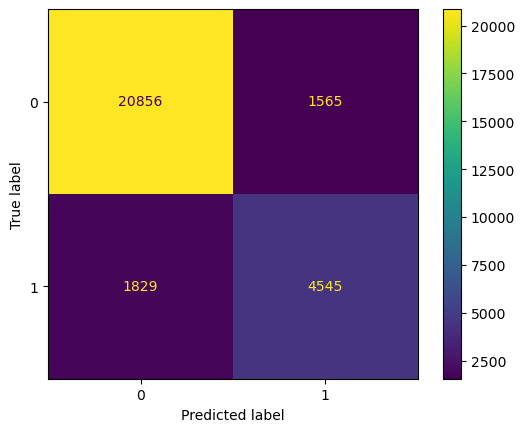

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92     22421
           1       0.74      0.71      0.73      6374

    accuracy                           0.88     28795
   macro avg       0.83      0.82      0.83     28795
weighted avg       0.88      0.88      0.88     28795



In [54]:
y_pred = log_model.predict(X_train_status)

# evaluate
accuracy = accuracy_score(y_train, y_pred)
print(f'Training Accuracy: {accuracy:.4f}\n')

cm = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = log_model.classes_)
disp.plot()
plt.show()

report = classification_report(y_train, y_pred)
print(f'Classification Report:\n{report}')

In [55]:
# get the feature coefficients
features = X_train_status.columns
coefficients = log_model.coef_[0]

# print coefficients with feature names
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

print("Feature Importance (Top):")
print(coef_df)

Feature Importance (Top):
                Feature  Coefficient
1         Interest Rate     0.934433
2  Percentage of Income     0.829022
4   Home Ownership_RENT     0.006101
5   Loan Intent_VENTURE    -0.063918
0                Income    -0.467259
3              Defaults    -4.327061


In [56]:
y_pred_prob = log_model.predict_proba(X_train_status)[:, 1]

# find ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_train, y_pred_prob)
roc_auc = auc(fpr, tpr)

# create thresholds dataframe
thresholds_df = pd.DataFrame({
    'Threshold': thresholds,
    'FPR': fpr,
    'TPR': tpr})

In [57]:
# Plot TPR and FPR vs. Threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, tpr, label = 'True Positive Rate (TPR)', color = 'green')
plt.plot(thresholds, fpr, label = 'False Positive Rate (FPR)', color = 'red')
plt.axvline(x=0.5, color = 'blue', linestyle = '--', label = 'Threshold = 0.5')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('TPR and FPR vs. Threshold')
plt.legend(loc = 'best')
plt.show()

In [58]:
# find optimum threshold (2 methods)
# Youden's J statistic
j = tpr - fpr

optimal_j = np.argmax(j)
threshold_j = thresholds[optimal_j]

print(f"Optimal Threshold (Youden's J): {threshold_j:.2f}")
print(f"TPR: {tpr[optimal_j]:.2f}, FPR: {fpr[optimal_j]:.2f}")

Optimal Threshold (Youden's J): 0.25
TPR: 0.91, FPR: 0.18


In [59]:
# Minimize distance to top left corner
d = np.sqrt((1 - tpr)**2 + fpr**2)

optimal_d = np.argmin(d)
threshold_d = thresholds[optimal_d]

print(f"Optimal Threshold (Youden's J): {threshold_d:.2f}")
print(f"TPR: {tpr[optimal_d]:.2f}, FPR: {fpr[optimal_d]:.2f}")

Optimal Threshold (Youden's J): 0.29
TPR: 0.88, FPR: 0.15


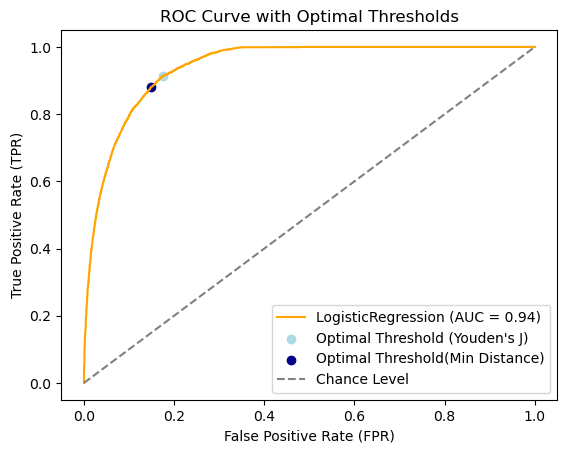

In [60]:
# graph ROC curve
RocCurveDisplay.from_estimator(log_model, X_train_status, y_train, color = 'orange')
plt.scatter(fpr[optimal_j], tpr[optimal_j], color = 'lightblue', label = "Optimal Threshold (Youden's J)")
plt.scatter(fpr[optimal_d], tpr[optimal_d], color = 'darkblue', label = 'Optimal Threshold(Min Distance)')
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'gray', label = 'Chance Level')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve with Optimal Thresholds')
plt.legend()
plt.show()

## Validate Model

Training Accuracy: 0.8579



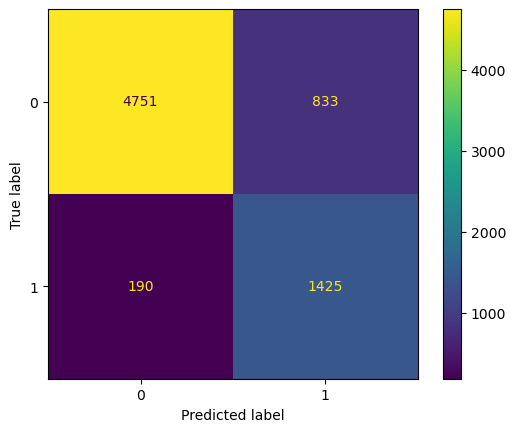

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      5584
           1       0.63      0.88      0.74      1615

    accuracy                           0.86      7199
   macro avg       0.80      0.87      0.82      7199
weighted avg       0.89      0.86      0.87      7199



In [61]:
y_val_prob = log_model.predict_proba(X_val_status)[:,1]

# set threshold of 0.29
tuned_threshold = 0.29
y_val_pred = (y_val_prob >= tuned_threshold).astype(int)

# evaluate
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Training Accuracy: {accuracy:.4f}\n')

cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = log_model.classes_)
disp.plot()
plt.show()

report = classification_report(y_val, y_val_pred)
print(f'Classification Report:\n{report}')

In [62]:
y_val_pred = log_model.predict(X_val_status)

# evaluate
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Training Accuracy: {accuracy:.4f}\n')

cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = log_model.classes_)
disp.plot()
plt.show()

report = classification_report(y_val, y_val_pred)
print(f'Classification Report:\n{report}')

Training Accuracy: 0.8793



Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      5584
           1       0.74      0.71      0.72      1615

    accuracy                           0.88      7199
   macro avg       0.83      0.82      0.82      7199
weighted avg       0.88      0.88      0.88      7199



In [63]:
# test c values
C_values = [0.01, 0.1, 1, 10, 100, 200]
for c in C_values:
    log_model = LogisticRegression(C = c, random_state = 42)
    scores = cross_val_score(log_model, X_train_status, y_train, cv = 5, scoring = 'accuracy')
    print(f'C = {c}, Mean Cross Validation Accuracy = {scores.mean():.4f}\n')

C = 0.01, Mean Cross Validation Accuracy = 0.8819

C = 0.1, Mean Cross Validation Accuracy = 0.8818

C = 1, Mean Cross Validation Accuracy = 0.8817

C = 10, Mean Cross Validation Accuracy = 0.8818

C = 100, Mean Cross Validation Accuracy = 0.8818

C = 200, Mean Cross Validation Accuracy = 0.8818



In [64]:
# update model with a c value of 100
log_model_tuned = LogisticRegression(C = 100, random_state = 11)
log_model_tuned.fit(X_train_status, y_train)

LogisticRegression(C=100, random_state=11)

## Test Model

In [65]:
y_test_pred = log_model_tuned.predict(X_test_status)
print(f'Test Accuracy (Logistic Regression): {accuracy_score(y_test, y_test_pred):.4f}')

Test Accuracy (Logistic Regression): 0.8775


# Support Vector Classification (Status Prediction)

In [66]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

## Train Model

In [67]:
# fit SVC model
svc_model = SVC(probability = True, random_state = 11)
svc_model.fit(X_train_status, y_train)

SVC(probability=True, random_state=11)

In [68]:
y_pred = svc_model.predict(X_train_status)

# evaluate
accuracy = accuracy_score(y_train, y_pred)
print(f'Training Accuracy: {accuracy:.4f}\n')

cm = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = svc_model.classes_)
disp.plot()
plt.show()

report = classification_report(y_train, y_pred)
print(f'Classification Report:\n{report}')

Training Accuracy: 0.8985



Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     22421
           1       0.79      0.74      0.76      6374

    accuracy                           0.90     28795
   macro avg       0.86      0.84      0.85     28795
weighted avg       0.90      0.90      0.90     28795



In [69]:
# Define hyperparameter grid
grid = {'C': [0.1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly']}

# Grid search with GPU-accelerated SVC
grid_search = GridSearchCV(SVC(probability = True), grid, cv = 5, scoring = 'accuracy')
grid_search.fit(X_train_status, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 100, 'kernel': 'rbf'}


## Validate Model

In [70]:
svc_model_tuned = grid_search.best_estimator_

Training Accuracy: 0.8975



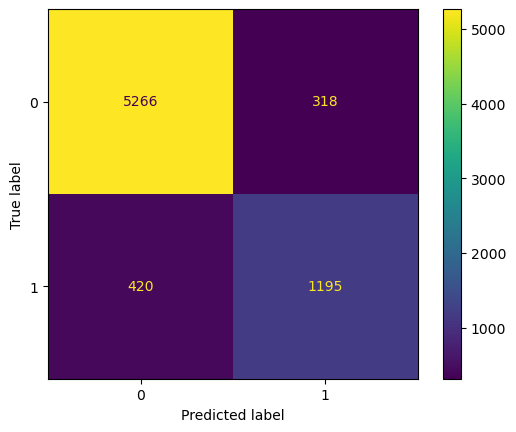

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      5584
           1       0.79      0.74      0.76      1615

    accuracy                           0.90      7199
   macro avg       0.86      0.84      0.85      7199
weighted avg       0.90      0.90      0.90      7199



In [71]:
y_val_pred = svc_model_tuned.predict(X_val_status)

# evaluate
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Training Accuracy: {accuracy:.4f}\n')

cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = svc_model.classes_)
disp.plot()
plt.show()

report = classification_report(y_val, y_val_pred)
print(f'Classification Report:\n{report}')

## Test Model

In [72]:
y_test_pred = svc_model_tuned.predict(X_test_status)
print(f'Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}')

Test Accuracy: 0.8978


# Random Forest (Status Prediction)

In [73]:
from sklearn.ensemble import RandomForestClassifier

## Train Model

In [74]:
tree_model = RandomForestClassifier(random_state = 11)

tree_model.fit(X_train_status, y_train)

RandomForestClassifier(random_state=11)

## Validate Model

In [75]:
y_pred_tree = tree_model.predict(X_val_status)

# evaluate
accuracy = accuracy_score(y_val, y_pred_tree)
print(f'Training Accuracy: {accuracy:.4f}\n')

cm = confusion_matrix(y_val, y_pred_tree)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = tree_model.classes_)
disp.plot()
plt.show()

report = classification_report(y_val, y_pred_tree)
print(f'Classification Report:\n{report}')

Training Accuracy: 0.9007



Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      5584
           1       0.79      0.75      0.77      1615

    accuracy                           0.90      7199
   macro avg       0.86      0.85      0.85      7199
weighted avg       0.90      0.90      0.90      7199



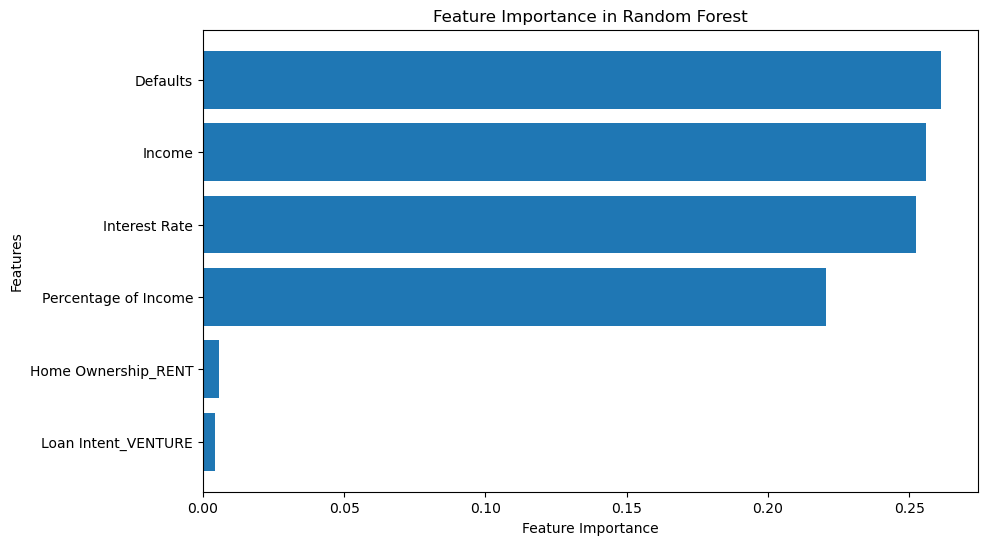

In [76]:
# investigate feature importance
feature_importance = tree_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X_val_status.columns,
    'Importance': feature_importance
}).sort_values(by = 'Importance', ascending=False)

# visualize
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()
plt.show()

In [77]:
# complete grid search to optimize model
grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 3, 10, 20],
    'min_samples_split': [10, 30, 100],
    'min_samples_leaf': [10, 20, 30],
    'bootstrap': [True, False]}

# Set up GridSearch
grid_search = GridSearchCV(estimator = RandomForestClassifier(random_state = 2), 
                           param_grid = grid, 
                           cv = 3, 
                           scoring = 'accuracy', 
                           verbose = 3, 
                           n_jobs = -1)

# Fit to the training data
grid_search.fit(X_train_status, y_train)

# Best parameters
print(f"Best parameters: {grid_search.best_params_}")
tree_model_tuned = grid_search.best_estimator_

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 100}


## Test Model

In [78]:
# predict using the hyperparameters determined above
y_pred_test_tree = tree_model_tuned.predict(X_test_status)

# evaluate
accuracy = accuracy_score(y_test, y_pred_test_tree)
print(f'Testing Accuracy: {accuracy:.4f}\n')

Testing Accuracy: 0.9030



# Compare Models (Status Prediction)

In [79]:
# calculate AUC for each
y_pred_prob_log = log_model_tuned.predict_proba(X_test_status)[:, 1]
y_pred_prob_svc = svc_model_tuned.predict_proba(X_test_status)[:, 1]
y_pred_prob_tree = tree_model_tuned.predict_proba(X_test_status)[:, 1]

# find AUC
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_pred_prob_log)
log_auc = auc(fpr_log, tpr_log)

fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, y_pred_prob_svc)
svc_auc = auc(fpr_svc, tpr_svc)

fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_pred_prob_tree)
tree_auc = auc(fpr_tree, tpr_tree)

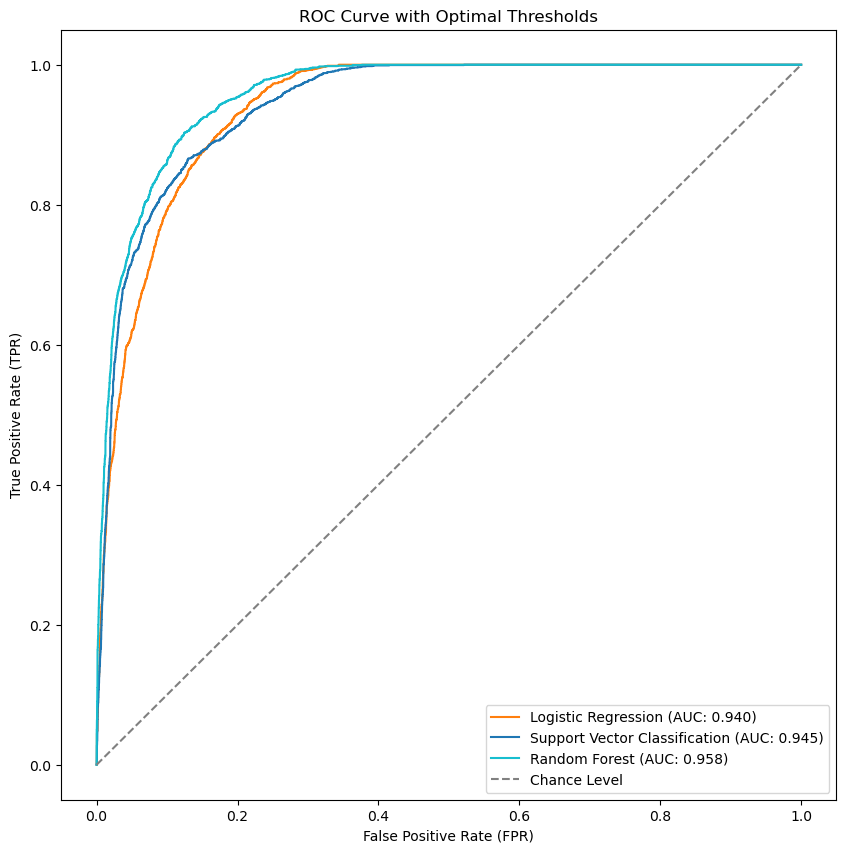

In [80]:
# graph ROC curves
fig, ax = plt.subplots(figsize = (10, 10))

# logistic regression
RocCurveDisplay.from_estimator(log_model_tuned, X_test_status, y_test, color = '#FF7F0E', 
                               label = f'Logistic Regression (AUC: {log_auc:.3f})', ax = ax)
# SVC
RocCurveDisplay.from_estimator(svc_model_tuned, X_test_status, y_test, color = '#1F77B4', 
                               label = f'Support Vector Classification (AUC: {svc_auc:.3f})', ax = ax)
# Random Forest
RocCurveDisplay.from_estimator(tree_model_tuned, X_test_status, y_test, color = '#17BECF', 
                               label = f'Random Forest (AUC: {tree_auc:.3f})', ax = ax)

plt.plot([0, 1], [0, 1], linestyle = '--', color = 'gray', label = 'Chance Level')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve with Optimal Thresholds')
plt.legend()
plt.show()

# Linear Regression Model (Credit Score Prediction FAILED CONJECTURE)

In [81]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [82]:
df_lin = df.drop(columns=['Status', 'Percentage of Income', 'Interest Rate', 'Loan Intent', 'Loan Amount'])
categorical_cols = ['Defaults', 'Home Ownership', 'Sex', 'Education Level']

# Create a LabelEncoder object
le = LabelEncoder()

# Encode the categorical columns
for col in categorical_cols:
    df_lin[col] = le.fit_transform(df_lin[col])

df_lin.head()

Age  Sex  Education Level   Income  Employment Years  Home Ownership  \
0  22.0    0                4  71948.0                 0               3   
1  21.0    0                3  12282.0                 0               2   
2  25.0    0                3  12438.0                 3               0   
3  23.0    0                1  79753.0                 0               3   
4  24.0    1                4  66135.0                 1               3   

   Years of Credit History  Credit Score  Defaults  
0                      3.0           561         0  
1                      2.0           504         1  
2                      3.0           635         0  
3                      2.0           675         0  
4                      4.0           586         0

In [83]:
X = df_lin.drop('Credit Score', axis=1)
y = (df_lin['Credit Score'])

# Split the data into training and testing sets
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X, y, test_size=0.1)

# Create a linear regression model
lin_model = LinearRegression()

# Train the model on the training data
lin_model.fit(X_train_lin, y_train_lin)

# Make predictions on the testing data
y_pred_lin = lin_model.predict(X_test_lin)

# Evaluate the model's performance
mse = mean_squared_error(y_test_lin, y_pred_lin)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test_lin, y_pred_lin)

print("R-squared:", r2)

Mean Squared Error: 2413.739726652929
R-squared: 0.06492754366073084


In [84]:
for feature, coef in zip(X.columns, lin_model.coef_):
    print(f"{feature:30} {coef:2f}")

Age                            0.014295
Sex                            -0.163464
Education Level                0.510098
Income                         0.000009
Employment Years               1.445083
Home Ownership                 -0.682967
Years of Credit History        0.068884
Defaults                       -18.233169


### Problem 4: Presentation in the class (10 mins and 10 points)

* (5 points) Present your slides in the class. 
* (5 points) Participate in peer review process. 

Suggestion: You should practice so that your presentation does not exceed 10 minutes. All members of a group should share equal responsibility to present. **Points may be taken away if presentation exceeds 10 mins.** 



# Report: communicate the results (20 points (or 25 points))

** minimum 8 pages **

(1) (5 points) What is your business proposition?

(2) (3 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data? What conjectures you made? Which conjecture you used as the basis of developing your model? Why?

(4) (3 points) How does your analysis support your business proposition?
(please include figures or tables in the report, but no source code)

(5) (4 points) How does the model tie in with the business proposition?

(5) (bonus 5 points) How did your team work together as a group from ideation to implementaion? Write in one page.

# Slides (for 10 minutes of presentation) (10 points)


1. (2 points) Motivation about the data collection, why the topic is interesting to you. 


2. (3 points) Conjectures you made. Reasons behind choosing a particular conjecture for the basis of developing a model.


2. (3 points) Communicating Results (figure/table)


4. (2 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)



# Done

All set! 

**What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "groupname.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook.

* **PPT Slides**

* **Report**

Put the Jupyter Notebook file, the report (in PDF) and PPT slides (converted to PDF) in a folder. Zip the folder. After zipping, it should have the extension .zip. The name of the .zip file should be casestudy_4_groupname.zip. Upload the .zip file on Canvas.
        
**Note: Each team just needs to make one submission**
